# **INTRODUCTION**
---

## **Final Project - Group 002**

**Batch: FTDS - RMT - 049**

Team Member:
- Ghozie Ikhsan Fairuz
- Ilham Den Fatah
- Nuha Raffa Raniyyah
- Umbu Michael Fernando Andumanang

**Objective:**

**Coffee Recommendation System** merupakan sebuah sistem rekomendasi yang dikembangkan untuk membantu pengguna dalam memilih biji kopi yang sesuai dengan preferensi pribadi mereka. Sistem ini dibangun menggunakan dataset katalog produk kopi dari Tokopedia, khususnya dari beberapa roastery terpercaya di Indonesia. Sistem rekomendasi dikembangkan untuk mengolah preferensi pengguna, menghasilkan rekomendasi biji kopi yang relevan, serta membantu pengguna menemukan kopi yang sesuai dengan selera mereka. Dengan demikian, sistem ini diharapkan dapat meningkatkan pengalaman eksplorasi kopi secara lebih terarah, informatif, dan efisien.



# **IMPORT LIBRARIES**
---

In [207]:
# Import libraries

import re
import warnings
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# **DATA LOADING**
---

In [208]:
# Read file csv
df = pd.read_csv('tokopedia_products_cleaned.csv')
print(df.shape)

# Summary Information of dfset
df.info()
print('\n')

# Summary statistic deskriptive numerical columns
print('Describe Numeric:')
display(df.describe(include=[np.number]).T)
print('\n')

# Duplicated df
print(f'Number of Duplicated df: {df.duplicated().sum()}\n')

# Displays the first 10 df and the last 10 df
print("The first 10 df Coffee:")
display(df.head(10))

print("The Last 10 df Coffee:")
display(df.tail(10))

(1070, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   source                1070 non-null   object
 1   name                  1070 non-null   object
 2   price                 1070 non-null   int64 
 3   description           1070 non-null   object
 4   has_missing_critical  1070 non-null   bool  
 5   is_price_outlier      1070 non-null   bool  
 6   is_coffee             1070 non-null   bool  
dtypes: bool(3), int64(1), object(3)
memory usage: 36.7+ KB


Describe Numeric:


,count,mean,std,min,25%,50%,75%,max
price,1070.0,193765.157009,459576.501471,1600.0,75000.0,139900.0,225000.0,13900000.0




Number of Duplicated df: 0

The first 10 df Coffee:


,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee
0,Instinct Roastery,Candy Apple Espresso Roast - Instinct Roastery...,195000,50% Toraja Washed - 20% Colombia Sequoias Wate...,False,False,True
1,Instinct Roastery,Ethiopia Tima Washed - Instinct Roastery - 150...,185000,Region : Guji Process : Washed Variety : 74110...,False,False,True
2,Instinct Roastery,Espresso Roast Kenya Tatu - Instinct Roastery ...,195000,Process : Natural Region : Kiambu County Farm ...,False,False,True
3,Instinct Roastery,Ethiopia Sidama Baturo - Instinct Roastery - 1...,220000,Process : Anaerobic Natural Variety : 74158 Re...,False,False,True
4,Instinct Roastery,Colombia Eliecer Ordóñez - Instinct Roastery -...,175000,Process : Washed Variety : Pink Bourbon Region...,False,False,True
5,Instinct Roastery,Burundi Kayanza Natural - Instinct Roastery - ...,185000,Process : Natural Variety : Bourbon Farm : Lon...,False,False,True
6,Instinct Roastery,Caramel Floral - Instinct Roastery Espresso Bl...,190000,Toraja Pango-Pango Washed - Ethiopia Washed Th...,False,False,True
7,Instinct Roastery,Toraja Pango-Pango Washed - Instinct Roastery ...,180000,"Variety : S-Lini, Bourbon Process : Washed Reg...",False,False,True
8,Instinct Roastery,Ethiopia Sidama Karama Washed - Instinct Roast...,195000,Region : Bura Karamo Altitude : 2200 masl Proc...,False,False,True
9,Instinct Roastery,"Apparel - Instinct Roastery T-Shirt - Putih, S",280000,A collective creation from our brand An exciti...,False,False,False


The Last 10 df Coffee:


,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee
1060,Arutala Coffee,WoCA Premium Chocolate Bar - Cokelat Batang Ra...,35999,WOCA CHOCOLATE BAR COCONUT 100% Chocolate bar ...,False,False,True
1061,Arutala Coffee,WoCA Premium Chocolate Bar - Cokelat Batang Ra...,35999,WOCA CHOCOLATE BAR PEPPERMINT 100% Chocolate b...,False,False,True
1062,Arutala Coffee,WoCA Premium Chocolate Bar - Cokelat Batang Ra...,35999,WOCA CHOCOLATE BAR ORIGINAL 100% Chocolate bar...,False,False,True
1063,Arutala Coffee,ARUTALA Kopi Arabika Gayo Luwak Liar 200 gram ...,169900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True
1064,Arutala Coffee,ARUTALA Kopi Robusta Jawa Java Coffee Indonesi...,54900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True
1065,Arutala Coffee,ARUTALA Kopi Arabika Gayo Arabica Coffee 200 g...,79900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True
1066,Arutala Coffee,ARUTALA Kopi Robusta Gayo Coffee 200 gram - Biji,54900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True
1067,Arutala Coffee,ARUTALA Kopi Arabika Jawa 200 gram - Bean,74900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True
1068,Arutala Coffee,ARUTALA Kopi Italian Blend 200 gram - Biji,79900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True
1069,Arutala Coffee,ARUTALA Gourmet Blend Kopi - For Manual Brewed...,79900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True


# **EXPLORATORY DATA ANALYSIS (EDA)**
---

## - Simple Exploratory for Advanced Data Cleaning

In [209]:
# Check Unique value 'description' and 'name' columns
def check_unique(df, columns):
    for col in columns:
        print(f"\nColumn: {col}")
        print(f"Total Data   : {df[col].count()}")
        print(f"Unique Value : {df[col].nunique()}")
        print(f"Daftar Unique:")
        print(df[col].unique())

check_unique(df, ['name', 'description'])


Column: name
Total Data   : 1070
Unique Value : 1069
Daftar Unique:
['Candy Apple Espresso Roast - Instinct Roastery - 200 gram'
 'Ethiopia Tima Washed - Instinct Roastery - 150 gram'
 'Espresso Roast Kenya Tatu - Instinct Roastery - 200 gram' ...
 'ARUTALA Kopi Arabika Jawa 200 gram - Bean'
 'ARUTALA Kopi Italian Blend 200 gram - Biji'
 'ARUTALA Gourmet Blend Kopi - For Manual Brewed Coffee - 200 gram - Biji']

Column: description
Total Data   : 1070
Unique Value : 984
Daftar Unique:
['50% Toraja Washed - 20% Colombia Sequoias Watermelon - 30% Flores Natural A little fun we have on the roastery when we stumble on this sample on our cupping table We thought, "What if we make a blend that tastes like candy and apple at the same time?" And just like that, this blend is made out of a combination we\'ve never thought before With our Toraja Pango-Pango Washed as our base, we give a combination with Flores Natural which enhances the sweetness and mouthfeel together with toraja, and the colo

Berdasarkan hasil eksplorasi sederhana yang sudah dilakukan, dataset yang akan digunakan sudah bersih dan tipe data tiap kolom sudah sesuai. Tidak ada data duplikat dan missing value pada dataset produk coffee. Selanjutnya akan dilakukan proses cleaning untuk menghilangkan simbol pada value rows, normalisasi value menjadi lowercase, dan menghapus product non-coffee dari dataset.

## - Advanced Data Cleaning

In [210]:
# Remove special characters from values

columns=['source','name','description']

for cols in columns:
    df[cols]=df[cols].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

df


,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee
0,Instinct Roastery,Candy Apple Espresso Roast Instinct Roastery ...,195000,50 Toraja Washed 20 Colombia Sequoias Waterme...,False,False,True
1,Instinct Roastery,Ethiopia Tima Washed Instinct Roastery 150 gram,185000,Region Guji Process Washed Variety 74110 Al...,False,False,True
2,Instinct Roastery,Espresso Roast Kenya Tatu Instinct Roastery ...,195000,Process Natural Region Kiambu County Farm T...,False,False,True
3,Instinct Roastery,Ethiopia Sidama Baturo Instinct Roastery 150...,220000,Process Anaerobic Natural Variety 74158 Regi...,False,False,True
4,Instinct Roastery,Colombia Eliecer Ordez Instinct Roastery 150...,175000,Process Washed Variety Pink Bourbon Region ...,False,False,True
...,...,...,...,...,...,...,...
1065,Arutala Coffee,ARUTALA Kopi Arabika Gayo Arabica Coffee 200 g...,79900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True
1066,Arutala Coffee,ARUTALA Kopi Robusta Gayo Coffee 200 gram Biji,54900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True
1067,Arutala Coffee,ARUTALA Kopi Arabika Jawa 200 gram Bean,74900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True
1068,Arutala Coffee,ARUTALA Kopi Italian Blend 200 gram Biji,79900,KENAPA ARUTALA COFFEE Dengan memiliki roastery...,False,False,True


In [211]:
# Convert all values to lowercase

for col in columns:
    df[col]=df[col].str.lower()

df

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee
0,instinct roastery,candy apple espresso roast instinct roastery ...,195000,50 toraja washed 20 colombia sequoias waterme...,False,False,True
1,instinct roastery,ethiopia tima washed instinct roastery 150 gram,185000,region guji process washed variety 74110 al...,False,False,True
2,instinct roastery,espresso roast kenya tatu instinct roastery ...,195000,process natural region kiambu county farm t...,False,False,True
3,instinct roastery,ethiopia sidama baturo instinct roastery 150...,220000,process anaerobic natural variety 74158 regi...,False,False,True
4,instinct roastery,colombia eliecer ordez instinct roastery 150...,175000,process washed variety pink bourbon region ...,False,False,True
...,...,...,...,...,...,...,...
1065,arutala coffee,arutala kopi arabika gayo arabica coffee 200 g...,79900,kenapa arutala coffee dengan memiliki roastery...,False,False,True
1066,arutala coffee,arutala kopi robusta gayo coffee 200 gram biji,54900,kenapa arutala coffee dengan memiliki roastery...,False,False,True
1067,arutala coffee,arutala kopi arabika jawa 200 gram bean,74900,kenapa arutala coffee dengan memiliki roastery...,False,False,True
1068,arutala coffee,arutala kopi italian blend 200 gram biji,79900,kenapa arutala coffee dengan memiliki roastery...,False,False,True


In [212]:
# Remove White spaces

df.columns=df.columns.str.strip()

df.head(5)

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee
0,instinct roastery,candy apple espresso roast instinct roastery ...,195000,50 toraja washed 20 colombia sequoias waterme...,False,False,True
1,instinct roastery,ethiopia tima washed instinct roastery 150 gram,185000,region guji process washed variety 74110 al...,False,False,True
2,instinct roastery,espresso roast kenya tatu instinct roastery ...,195000,process natural region kiambu county farm t...,False,False,True
3,instinct roastery,ethiopia sidama baturo instinct roastery 150...,220000,process anaerobic natural variety 74158 regi...,False,False,True
4,instinct roastery,colombia eliecer ordez instinct roastery 150...,175000,process washed variety pink bourbon region ...,False,False,True


In [213]:
# Non-Coffee Data Validation Based on is_coffee Feature

df.loc[df['is_coffee'] == False]

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee
9,instinct roastery,apparel instinct roastery tshirt putih s,280000,a collective creation from our brand an exciti...,False,False,False
11,instinct roastery,brewing tools instinct roastery instinct server,295000,brewing tools for catering your brewing experi...,False,False,False
17,fugol coffee roasters,gift card box christmas edition coffee add on,10000,tambahkan add on gift card natal tambahkan add...,False,False,False
37,fugol coffee roasters,baju kaos tshirt fugol coffee roasters typogr...,181350,penting semua pesanan yang masuk lewat dari ja...,False,False,False
38,fugol coffee roasters,baju kaos tshirt fugol coffee roasters graphi...,234000,penting semua pesanan yang masuk lewat dari ja...,False,False,False
...,...,...,...,...,...,...,...
984,arutala coffee,arutala v60 dripper 01 transparan arutala v60...,54999,arutala v60 dripper 01 bagi anda para pecinta ...,False,False,False
985,arutala coffee,arutala server coffee 390ml 01 390ml 01,59999,arutala server coffee arutala server coffee in...,False,False,False
995,arutala coffee,woca krunz chocolate dark 3 x 8 individual pac...,128999,woca krunz dark chocolate isi 3 krunz adalah k...,False,False,False
1028,arutala coffee,arutala kopi exotic blend 1kg bag chocolate bean,332900,kenapa arutala coffee dengan memiliki roastery...,False,False,False


In [214]:
# Removing Non-Coffee Data

df.drop(df[df['is_coffee'] == False].index, inplace=True)

df.loc[df['is_coffee'] == False].head()

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee


Berdasarkan hasil analisis, data yang termasuk kedalam is_not_coffee adalah produk perlengkapan dan merchandise yang dijual oleh roastery tersebut atau produk coffee yang ada dalam bag. Seluruh produk non-coffee tidak akan digunakan dalam analisis dan modelling sehingga produk-produk tersebut akan di remove dari dataset.

### Anomali Detections 

In [215]:
# Filter coffee products

keywords = [
    'arabica','robusta','arabika','coffee beans','coffee bean','biji kopi','biji','bean'
    ,'process','espresso','roasted','geisha'
]
coffee_pattern = '|'.join(keywords)

text = df['name'].fillna('') + ' ' + df['description'].fillna('')

coffee = df.loc[
    (
        text.str.contains(coffee_pattern)
    )
]

coffee

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee
0,instinct roastery,candy apple espresso roast instinct roastery ...,195000,50 toraja washed 20 colombia sequoias waterme...,False,False,True
1,instinct roastery,ethiopia tima washed instinct roastery 150 gram,185000,region guji process washed variety 74110 al...,False,False,True
2,instinct roastery,espresso roast kenya tatu instinct roastery ...,195000,process natural region kiambu county farm t...,False,False,True
3,instinct roastery,ethiopia sidama baturo instinct roastery 150...,220000,process anaerobic natural variety 74158 regi...,False,False,True
4,instinct roastery,colombia eliecer ordez instinct roastery 150...,175000,process washed variety pink bourbon region ...,False,False,True
...,...,...,...,...,...,...,...
1065,arutala coffee,arutala kopi arabika gayo arabica coffee 200 g...,79900,kenapa arutala coffee dengan memiliki roastery...,False,False,True
1066,arutala coffee,arutala kopi robusta gayo coffee 200 gram biji,54900,kenapa arutala coffee dengan memiliki roastery...,False,False,True
1067,arutala coffee,arutala kopi arabika jawa 200 gram bean,74900,kenapa arutala coffee dengan memiliki roastery...,False,False,True
1068,arutala coffee,arutala kopi italian blend 200 gram biji,79900,kenapa arutala coffee dengan memiliki roastery...,False,False,True


In [216]:
# Update is_coffee column

df["is_coffee"] = False
df.loc[coffee.index, "is_coffee"] = True

In [217]:
# Filter anomaly data

txt_idx = ['name', 'description']

# Create anomaly mask based on unit and packaging
mask = (
    df[txt_idx]
    .apply(lambda col: col.str.contains('liter|ml|mililiter|1 l|pcs|sachet|box|box set'))
    .any(axis=1)
)

df["is_anomaly"] = False
df.loc[mask, 'is_anomaly'] = True

# Second Mask: Non-Coffee Products
mask2 = (
    df[txt_idx]
    .apply(lambda col: col.str.contains('grinder|tray|dripper|concentrate|cookies|hampers|bundling|ready to drink'))
    .any(axis=1)
)

df.loc[mask2, 'is_anomaly'] = True

### Data Validation

In [218]:
# Validate Non-Coffee Labels on Coffee Product Index

df.loc[[219, 225, 228, 231], ['name']]

,name
219,indonesia flores mbohang lot 1189 private lot...
225,indonesia semendo 96 hours hsn 150g
228,indonesia gulang 2817 natural anaerobic 150g
231,ethiopia alo village hamasho mariwo 74158 100g


In [219]:
# Manually label coffee products

df.loc[[219, 225, 228, 231], 'is_coffee']=True

In [220]:
# Filtering Coffee Products with Anomalous Flags

df.loc[(df['is_anomaly'] == True) & (df['is_coffee'] == True)]

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee,is_anomaly
116,fugol coffee roasters,espresso cair konsentrat kopi 1 liter arabic...,142000,penting semua pesanan yang masuk lewat dari ja...,False,False,True,True
117,fugol coffee roasters,espresso cair konsentrat kopi 500 ml arabica...,81000,penting semua pesanan yang masuk lewat dari ja...,False,False,True,True
125,fugol coffee roasters,espresso cair konsentrat kopi 1 l arabusta ...,126000,penting semua pesanan yang masuk lewat dari ja...,False,False,True,True
126,fugol coffee roasters,espresso cair konsentrat kopi 500 ml arabust...,75000,penting semua pesanan yang masuk lewat dari ja...,False,False,True,True
149,fugol coffee roasters,kopi tubruk sachet fugol coffee roasters spec...,28000,new drop kopi tubruk sachet isi 1 paket 3 pcs ...,False,False,True,True
...,...,...,...,...,...,...,...,...
938,arutala coffee,arutala coffee journey 10 diverse indonesian c...,44900,arutala coffee journey adalah ragam kopi indon...,False,False,True,True
939,arutala coffee,arutala coffee journey 10 diverse indonesian c...,57900,arutala coffee journey adalah ragam kopi indon...,False,False,True,True
959,arutala coffee,arutala french press coffee tea maker 350ml ...,95999,arutala french press coffee tea maker french ...,False,False,True,True
964,arutala coffee,woca paket bundling thin cookies 3 varian rasa...,101999,woca thin cookies paket bundling 3 varian rasa...,False,False,True,True


In [221]:
# Filtering Anomalous and Non-Coffee Products

df.loc[(df['is_anomaly'] == True) & (df['is_coffee'] == False)]

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee,is_anomaly
130,fugol coffee roasters,the bottle series minuman es kopi kemasan boto...,33000,penting semua pesanan yang masuk lewat dari ja...,False,False,False,True
301,a roastworks,kromatik tint 19 l kromatik mineral for coffee,60000,many of you have asked what water should be us...,False,False,False,True
302,a roastworks,a roastworks vest black unisex m,320000,a roastworks vest black unisex bahan twill 20...,False,False,False,True
352,swargi roasters,swargi palate cleanser for coffee cupping,80000,swargi palate cleanser packed each 10ml in box...,False,False,False,True
416,sakha coffee bali,sendok takar kopi 2in1 stainless alat seduh co...,49900,halo sobat brewer butuh sendok takar yang fung...,False,False,False,True
466,sakha coffee bali,filter saringan kopi portable cone v60 coffee ...,39900,halo sobat brewers filter penyaring yang bergu...,False,False,False,True
521,sakha coffee bali,paper filter v60 coffee saringan kopi bubuk ke...,44900,halo sobat brewer pasti anda sudah tidak asing...,False,False,False,True
617,say something coffee,japanese iced drip 500ml khusus instant same day,48750,ice filter coffee yang siap untuk dinikmati ka...,False,False,False,True
618,say something coffee,chill the brown kopi susu 500 ml khusus insta...,48750,creamy light tasty kopi chill perpaduan kopi ...,False,False,False,True
654,maleena coffee roasters,hampers natal 2025 dan tahun baru 2026 type 2,1582500,maleena coffee roasters natal dan tahun baru 2...,False,True,False,True


In [222]:
# Filtering Non-Anomalous Coffee Products

df.loc[(df['is_anomaly'] == False) & (df['is_coffee'] == True)]

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee,is_anomaly
0,instinct roastery,candy apple espresso roast instinct roastery ...,195000,50 toraja washed 20 colombia sequoias waterme...,False,False,True,False
1,instinct roastery,ethiopia tima washed instinct roastery 150 gram,185000,region guji process washed variety 74110 al...,False,False,True,False
2,instinct roastery,espresso roast kenya tatu instinct roastery ...,195000,process natural region kiambu county farm t...,False,False,True,False
3,instinct roastery,ethiopia sidama baturo instinct roastery 150...,220000,process anaerobic natural variety 74158 regi...,False,False,True,False
4,instinct roastery,colombia eliecer ordez instinct roastery 150...,175000,process washed variety pink bourbon region ...,False,False,True,False
...,...,...,...,...,...,...,...,...
1065,arutala coffee,arutala kopi arabika gayo arabica coffee 200 g...,79900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1066,arutala coffee,arutala kopi robusta gayo coffee 200 gram biji,54900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1067,arutala coffee,arutala kopi arabika jawa 200 gram bean,74900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1068,arutala coffee,arutala kopi italian blend 200 gram biji,79900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False


In [223]:
# Filtering Non-Coffee, Non-Anomalous Products

df.loc[(df['is_anomaly'] == False) & (df['is_coffee'] == False)]

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee,is_anomaly
173,fugol coffee roasters,greeting card kartu ucapan red,3000,jika ingin menambahkan ucapan di kartu langsun...,False,False,False,False
336,nyawang langit roastery,an matcha powder ceremonial grade 30g,205000,an matcha is a ceremonial grade matcha from ka...,False,False,False,False
337,nyawang langit roastery,seimei matcha powder organic ceremonial 30g,295000,seimei matcha organic ceremonial grade is a pr...,False,False,False,False
338,nyawang langit roastery,loishi matcha powder organic ceremonial 30g,270000,loishi matcha is a organic ceremonial grade ja...,False,False,False,False
593,say something coffee,paper filter v60 white kertas saringan kopi d...,40000,paper filter v60 made in japan isi 100 lembar...,False,False,False,False
647,jack runners roastery,additional packaging,10000,additional packaging sedia ukuran 200 gr 500 g...,False,False,False,False
648,jack runners roastery,barista class by jackrunner basic class,850000,barista class by jack runner mau jadi barista ...,False,True,False,False
685,maleena coffee roasters,maleena coffee roasters milk frother brown cz...,420000,maleena coffee roasters milk frother brown cz...,False,False,False,False
723,hayati coffee roaster,kartu ucapan hayati coffee,10000,kartu ucapan untuk pemberian hadiah ke teman ...,False,False,False,False
737,herd coffee roaster,herd robries foldable totebag daur ulang,250000,herd robries foldable totebag daur ulang keci...,False,False,False,False


Setelah validasi data, drop data yang termasuk anomaly dan bukan merupakan kopi

In [224]:
# Remove Anomalous and Non-Coffee Products

df.drop(df[df['is_anomaly'] == True].index, inplace=True)
df.drop(df[df['is_coffee'] == False].index, inplace=True)

df

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee,is_anomaly
0,instinct roastery,candy apple espresso roast instinct roastery ...,195000,50 toraja washed 20 colombia sequoias waterme...,False,False,True,False
1,instinct roastery,ethiopia tima washed instinct roastery 150 gram,185000,region guji process washed variety 74110 al...,False,False,True,False
2,instinct roastery,espresso roast kenya tatu instinct roastery ...,195000,process natural region kiambu county farm t...,False,False,True,False
3,instinct roastery,ethiopia sidama baturo instinct roastery 150...,220000,process anaerobic natural variety 74158 regi...,False,False,True,False
4,instinct roastery,colombia eliecer ordez instinct roastery 150...,175000,process washed variety pink bourbon region ...,False,False,True,False
...,...,...,...,...,...,...,...,...
1065,arutala coffee,arutala kopi arabika gayo arabica coffee 200 g...,79900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1066,arutala coffee,arutala kopi robusta gayo coffee 200 gram biji,54900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1067,arutala coffee,arutala kopi arabika jawa 200 gram bean,74900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1068,arutala coffee,arutala kopi italian blend 200 gram biji,79900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False


**Summary**

Setelah proses validasi data, rows yang memenuhi `is_anomaly` True dan `is_coffee` False merupakan data yang tergolong anomali dan tidak akan digunakan dalam proses modeling. Data anomali tersebut berisi data non-coffee product seperti merchandise, cokelat, dan non-coffee product lain. Sehingga, data tersebut tidak relevan dengan model yang akan kami kembangkan yaitu model untuk memberikan rekomendasi biji kopi berdasarkan users preference. Maka, keputusan untuk membuang baris data tersebut adalah valid untuk menjaga keakuratan model.

### Remove Arabica–Robusta bean blends from the dataset as they are not part of the recommendation

In [225]:
# Filtering Data Based on Keyword Combinations

cleaning2 = df.loc[
    text.str.contains('blend')
    &
    text.str.contains('robusta')
    &
    text.str.contains('arabica|arabika')
    |
    (
        text.str.contains('arabica|arabika')
        &
        text.str.contains('robusta')
    )
]

cleaning2

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee,is_anomaly
84,fugol coffee roasters,espresso arabusta fruity blend kopi susu speci...,131000,penting semua pesanan yang masuk lewat dari ja...,False,False,True,False
101,fugol coffee roasters,biji kopi espresso house blend package arabica...,251000,penting semua pesanan yang masuk lewat dari ja...,False,False,True,False
128,fugol coffee roasters,espresso arabusta fruity blend kopi susu speci...,76000,penting semua pesanan yang masuk lewat dari ja...,False,False,True,False
129,fugol coffee roasters,espresso arabusta fruity blend kopi susu speci...,236000,penting semua pesanan yang masuk lewat dari ja...,False,False,True,False
192,fugol coffee roasters,sample biji kopi arabika espresso roast 20 gra...,25000,penting semua pesanan yang masuk lewat dari ja...,False,False,True,False
...,...,...,...,...,...,...,...,...
1023,arutala coffee,arutala x tokopedia blend untuk kopi susu 200 ...,59900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1037,arutala coffee,arutala kopi italian blend for espresso 1kg biji,379900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1039,arutala coffee,arutala blend coffee for kekinian kopi susu 1k...,284900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1044,arutala coffee,arutala kopi exotic blend 200 gram bean,69900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False


In [226]:
# Drop rows by index

for idx in cleaning2.index:
    df.drop(index=idx, inplace=True)
    
df

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee,is_anomaly
0,instinct roastery,candy apple espresso roast instinct roastery ...,195000,50 toraja washed 20 colombia sequoias waterme...,False,False,True,False
1,instinct roastery,ethiopia tima washed instinct roastery 150 gram,185000,region guji process washed variety 74110 al...,False,False,True,False
2,instinct roastery,espresso roast kenya tatu instinct roastery ...,195000,process natural region kiambu county farm t...,False,False,True,False
3,instinct roastery,ethiopia sidama baturo instinct roastery 150...,220000,process anaerobic natural variety 74158 regi...,False,False,True,False
4,instinct roastery,colombia eliecer ordez instinct roastery 150...,175000,process washed variety pink bourbon region ...,False,False,True,False
...,...,...,...,...,...,...,...,...
1064,arutala coffee,arutala kopi robusta jawa java coffee indonesi...,54900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1065,arutala coffee,arutala kopi arabika gayo arabica coffee 200 g...,79900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1066,arutala coffee,arutala kopi robusta gayo coffee 200 gram biji,54900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False
1067,arutala coffee,arutala kopi arabika jawa 200 gram bean,74900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False


**Summary**


Setelah proses filtering dan analisis pada data bean blends, kami memutuskan untuk mempertahankan kopi blend selama tidak merupakan campuran Arabica dan Robusta. Keputusan ini diambil karena model rekomendasi yang dikembangkan menggunakan parameter stomach sensitivity dan acidity sensitivity, di mana kopi blend Arabica–Robusta memiliki karakteristik yang kompleks dan sangat bergantung pada komposisi serta proses masing-masing roastery. Kompleksitas ini berpotensi menyulitkan penentuan parameter sensitivitas secara konsisten.
Oleh karena itu, untuk menjaga konsistensi fitur dan kejelasan keputusan model, analisis difokuskan pada dua jenis biji kopi utama, yaitu Arabica dan Robusta.

### Text Features Extractions

Pada section ini, akan dilakukan proses ekstraksi data untuk informasi origin, notes, roast level, dan process. Hal ini dilakukan untuk mendapatkan informasi yang lebih mendalam dan detail pada setiap baris data yang akan di analisis.

In [227]:
#  Merge product name and description into a new text column

df['text'] = df['name'].fillna('') + ' ' + df['description'].fillna('')

In [228]:
# Origin

ORIGIN_PATTERNS = {
    "ethiopia": r"\bethiopia(n)?\b",
    "brazil": r"\bbrazil(ian)?\b",
    "colombia": r"\bcolombia(n)?\b",
    "kenya": r"\bkenya(n)?\b",
    "indonesia": r"\bindonesia(n)?\b",
    "gayo": r"\bgayo\b",
    "aceh": r"\baceh\b",
    "toraja": r"\btoraja\b",
    "kintamani": r"\bkintamani\b",
    "bajawa": r"\bbajawa\b",
    "flores": r"\bflores\b",
    "papua": r"\bpapua\b",
    "lampung": r"\blampung\b",
    "java": r"\bjava\b",
    "sumatra": r"\b(sumatra|sumatera)\b",
    "jawa": r"\bjawa\b",
    "italian": r"\bitalian\b",
    "panama": r"\bpanama\b",
    "temanggung": r"\btemanggung\b",
    "bengkulu": r"\bbengkulu\b",
    "vietnam": r"\bvietnam\b",
    "enrekang": r"\benrekang\b",
    "bali": r"\bbali\b",
    "malabar": r"\bmalabar\b",
    "honduras": r"\bhonduras\b",
    "costa rica": r"\bcosta rica\b",
    "yemen": r"\byemen\b",
    "guatemala": r"\bguatemala\b",
    "tapanuli": r"\btapanuli\b",
    "thailand": r"\bthailand\b",
    "peru": r"\bperu\b",
    "kerinci": r"\bkerinci\b",
    "argopuro": r"\bargopuro\b",
    "yunnan": r"\byunnan\b",
    "rwanda": r"\brwanda\b",
    "finca de berman": r"\bfinca de berman\b",
    "yunding zhuchao": r"\byunding zhuchao\b",
    "magelang": r"\bmagelang\b",
    "angin angin": r"\bangin angin\b"
    
}

In [229]:
# Process

PROCESS_PATTERNS = {
    "Washed": r"\bwashed|wash\b",
    "Natural": r"\bnatural\b",
    "Honey": r"\bhoney\b",
    "Anaerobic": r"\banaerobic|anaerob\b",
    "Fermented": r"\bferment(ed|asi|ation)?\b",
    "Semi Washed": r"\b(semi[\s-]?washed|wet[\s-]?hulled|giling[\s-]?basah)\b",
    "Carbonic Maceration": r"\bcarbonic|carbonic maceration\b",
    "decaf": r"\bdecaf|dcaf|co2\b",
    "xo process": r"\bxo process|xo|dxo|bxo\b",
}


In [230]:
# Roast

ROAST_PATTERNS = {
    "Light": r"\blight(\sroast)?\b",
    "Medium": r"\bmedium(\sroast)?\b",
    "Dark": r"\bdark(\sroast)?\b"
}


In [231]:
# Notes

NOTES_PATTERNS = {
    "Chocolate": r"\b(chocolate|coklat|cocoa)\b",
    "Caramel": r"\bcaramel\b",
    "Nutty": r"\b(nutty|kacang|almond|hazelnut)\b",
    "Fruity": r"\b(fruity|buah|berry|berries|citrus|lemon|orange|watermelon|melon|pear|grape)\b",
    "Floral": r"\b(floral|bunga|jasmine)\b",
    "Sweet": r"\b(sweet|manis|brown sugar|gula aren|sweetness)\b",
    "Spicy": r"\b(spicy|rempah|cinnamon|kayu manis)\b",
    "Herbal": r"\b(herbal|tea|teh)\b",
    "Woody": r"\b(woody|kayu)\b",
}


In [232]:
def extract_multi(text, pattern_dict, sep=", "):
    '''
    The code extracts multiple labels from text using regex patterns 
    and concatenates the results into a single string

    '''

    if pd.isna(text) or text.strip() == "":
        return None

    text = text.lower()

    matches = [
        label.lower()
        for label, pattern in pattern_dict.items()
        if re.search(pattern, text)
    ]

    return sep.join(matches) if matches else 'unknown'

In [233]:
# Extract Origin
df['origin'] = df['text'].apply(
    lambda x: extract_multi(x, ORIGIN_PATTERNS)
)

# Extract process method
df['process'] = df['text'].apply(
    lambda x: extract_multi(x, PROCESS_PATTERNS)
)

# Extract Roast Level
df['roast_level'] = df['text'].apply(
    lambda x: extract_multi(x, ROAST_PATTERNS)
)

# xtract flavor Notes
df['notes'] = df['text'].apply(
    lambda x: extract_multi(x, NOTES_PATTERNS)
)


In [234]:
# Show all DataFrame rows with process equal to 'unknown'

df.loc[df['process']=='unknown']

,source,name,price,description,has_missing_critical,is_price_outlier,is_coffee,is_anomaly,text,origin,process,roast_level,notes
12,instinct roastery,p blend instinct roastery biji kopi 200 gram,180000,please note before buying untuk permintaan dig...,False,False,True,False,p blend instinct roastery biji kopi 200 gra...,unknown,unknown,unknown,unknown
13,instinct roastery,guatemala espresso instinct coffee biji kopi...,180000,please note before buying untuk permintaan dig...,False,False,True,False,guatemala espresso instinct coffee biji kopi...,"brazil, guatemala",unknown,unknown,"chocolate, nutty, sweet"
15,instinct roastery,espresso caramel nutty biji kopi espresso 500gr,295000,please note before buying untuk permintaan dig...,False,False,True,False,espresso caramel nutty biji kopi espresso 50...,unknown,unknown,unknown,"caramel, nutty, sweet"
22,fugol coffee roasters,biji kopi arabica ethiopia floral espresso ble...,398000,halal id32110016691860324 penting semua pesana...,False,False,True,False,biji kopi arabica ethiopia floral espresso ble...,ethiopia,unknown,medium,"fruity, floral, sweet"
87,fugol coffee roasters,biji kopi es kopi susu 5 kg grosir espresso ar...,204999,halal id32110016691860324 harap membaca ketera...,False,False,True,False,biji kopi es kopi susu 5 kg grosir espresso ar...,unknown,unknown,"medium, dark","chocolate, fruity"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,arutala coffee,arutala kopi robusta jawa java coffee indonesi...,54900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False,arutala kopi robusta jawa java coffee indonesi...,"indonesia, java, jawa, vietnam",unknown,"medium, dark","chocolate, sweet"
1065,arutala coffee,arutala kopi arabika gayo arabica coffee 200 g...,79900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False,arutala kopi arabika gayo arabica coffee 200 g...,"gayo, aceh, vietnam",unknown,"medium, dark","chocolate, fruity, sweet"
1066,arutala coffee,arutala kopi robusta gayo coffee 200 gram biji,54900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False,arutala kopi robusta gayo coffee 200 gram bij...,"gayo, aceh, vietnam",unknown,medium,"chocolate, sweet"
1067,arutala coffee,arutala kopi arabika jawa 200 gram bean,74900,kenapa arutala coffee dengan memiliki roastery...,False,False,True,False,arutala kopi arabika jawa 200 gram bean kenap...,"jawa, vietnam",unknown,medium,sweet


In [235]:
# Debugging

df.loc[326,'description']

'ethiopia  sumatra  java the olmecs blend a espresso blend from nyawang langit the olmecs is our special espresso blend born from combining three of the worlds best coffee regions nyawang langit tasting notes  output chocolate berries hint of vanilla caramel sweet after taste espresso resso an intense and balanced shot opening with a dominant note of rich chocolate enriched by subtle floral hints and cheerful berries finishing sweetly with a touch of vanilla and caramel black crafted for a powerful and profound flavor rich chocolate dominates perfected by the complex sweetness of melting brown sugar and caramel floral and berries provide bright layers resulting in a strong and distinctive finish white transforms into a luxurious gourmand experience resembling a smooth chocolate caramel trifle it features creamy milk chocolate and caramel amplified by vanilla and elegant floral notes with a slight hint of berries'

### Drop unused features and save to a new CSV

In [236]:
# Check all columns

df.columns

Index(['source', 'name', 'price', 'description', 'has_missing_critical',
       'is_price_outlier', 'is_coffee', 'is_anomaly', 'text', 'origin',
       'process', 'roast_level', 'notes'],
      dtype='object')

In [237]:
# Drop unused columns

columns_key=['price','origin','process','roast_level','notes']

columns.extend(columns_key)
for clmn in df.columns:
    if clmn not in columns:
        df.drop(columns=clmn, inplace=True)
        
df

,source,name,price,description,origin,process,roast_level,notes
0,instinct roastery,candy apple espresso roast instinct roastery ...,195000,50 toraja washed 20 colombia sequoias waterme...,"colombia, toraja, flores","washed, natural",unknown,"fruity, sweet"
1,instinct roastery,ethiopia tima washed instinct roastery 150 gram,185000,region guji process washed variety 74110 al...,ethiopia,washed,light,floral
2,instinct roastery,espresso roast kenya tatu instinct roastery ...,195000,process natural region kiambu county farm t...,kenya,"washed, natural",unknown,sweet
3,instinct roastery,ethiopia sidama baturo instinct roastery 150...,220000,process anaerobic natural variety 74158 regi...,ethiopia,"natural, anaerobic",unknown,"fruity, herbal"
4,instinct roastery,colombia eliecer ordez instinct roastery 150...,175000,process washed variety pink bourbon region ...,colombia,washed,unknown,sweet
...,...,...,...,...,...,...,...,...
1064,arutala coffee,arutala kopi robusta jawa java coffee indonesi...,54900,kenapa arutala coffee dengan memiliki roastery...,"indonesia, java, jawa, vietnam",unknown,"medium, dark","chocolate, sweet"
1065,arutala coffee,arutala kopi arabika gayo arabica coffee 200 g...,79900,kenapa arutala coffee dengan memiliki roastery...,"gayo, aceh, vietnam",unknown,"medium, dark","chocolate, fruity, sweet"
1066,arutala coffee,arutala kopi robusta gayo coffee 200 gram biji,54900,kenapa arutala coffee dengan memiliki roastery...,"gayo, aceh, vietnam",unknown,medium,"chocolate, sweet"
1067,arutala coffee,arutala kopi arabika jawa 200 gram bean,74900,kenapa arutala coffee dengan memiliki roastery...,"jawa, vietnam",unknown,medium,sweet


In [238]:
# Save to new csv

df.to_csv('tokopedia_products_ready.csv',index=False)

## **1. Text Exploration and Statistics**

Pada bagian ini, kami melakukan analisis terhadap tingkat keinformatifan teks yang terdapat pada kolom description. Analisis dilakukan dengan mengukur panjang teks pada kolom description dan name, kemudian membandingkan distribusi dan persebaran panjang teks tersebut untuk memahami kontribusi masing-masing kolom dalam menyampaikan informasi produk.

In [239]:
# Calculate word count in the describe column
df['desc_len'] = df['description'].fillna('').str.len()

# Calculate word count in the name column
df['name_len'] = df['name'].fillna('').str.len()

In [240]:
# Summary statistics
stats = {
    'min_length': df['desc_len'].min(),
    'max_length': df['desc_len'].max(),
    'median_length': df['desc_len'].median(),
    'mean_length': df['desc_len'].mean()
}

stats

{'min_length': 86,
 'max_length': 2732,
 'median_length': 989.0,
 'mean_length': 950.8338762214984}

In [241]:
# Statistic Descriptive 'describe' column

df['desc_len'].describe()

count     614.000000
mean      950.833876
std       405.595152
min        86.000000
25%       683.250000
50%       989.000000
75%      1123.000000
max      2732.000000
Name: desc_len, dtype: float64

In [242]:
# # Statistic Descriptive 'name' column

df['name_len'].describe()

count    614.000000
mean      70.537459
std       19.559865
min       31.000000
25%       55.000000
50%       71.000000
75%       81.000000
max      171.000000
Name: name_len, dtype: float64

In [243]:
# Proportion of Empty Descriptions

total_rows = len(df)

empty_mask = df['description'].isna() | (df['description'].str.strip() == '')
empty_percentage = empty_mask.mean() * 100

empty_percentage

0.0

In [244]:
# Percentage of Short Descriptions (Threshold-Based)

SHORT_THRESHOLD = 900

short_mask = df['desc_len'] < SHORT_THRESHOLD
short_percentage = short_mask.mean() * 100

short_percentage

33.876221498371336

In [245]:
# Select the top 10 longest descriptions by character count

longest_10 = (
    df[['description', 'desc_len']]
    .sort_values('desc_len', ascending=False)
    .head(10)
)

longest_10

,description,desc_len
636,produk ini adalah kopi mentah belum disangrai...,2732
639,produk ini adalah kopi mentah belum disangrai...,2101
638,produk ini adalah kopi mentah belum disangrai...,2097
786,ethiopia guji harsu natural hana roastery f...,1945
785,angin angin mossto natural yolan tirta hana...,1888
834,st george blend biji kopi 100 arabika untuk es...,1878
144,halal id32110016691860324 new special release ...,1856
788,exotic series janson coffee 465 mossto anaer...,1846
793,competition series los lajones lot 22a natur...,1840
837,st george blend biji kopi 100 arabika untuk es...,1819


In [246]:
# Select the top 10 shortest descriptions by character count

shortest_10 = (
    df[['description', 'desc_len']]
    .query('desc_len > 0')
    .sort_values('desc_len', ascending=True)
    .head(10)
)

shortest_10

,description,desc_len
230,costa rica tarrazu mirazu dcafetal black honey...,86
221,colombia san pedro milton monroy geisha natura...,87
226,panama lerida estate lot 5 montana honey proce...,89
219,indonesia flores mbohang lot 1189 private lot ...,114
220,indonesia west java loa paseh java origins var...,115
228,indonesia flores manggarai lot gulang 2817 nat...,116
227,ethiopia karamo bersa woreda leikun zegeye var...,116
223,indonesia semendo south sumatra species liberi...,120
184,origin gunung guntur west java indonesia proce...,123
224,country peru origin cajamarca farm quilla vari...,130


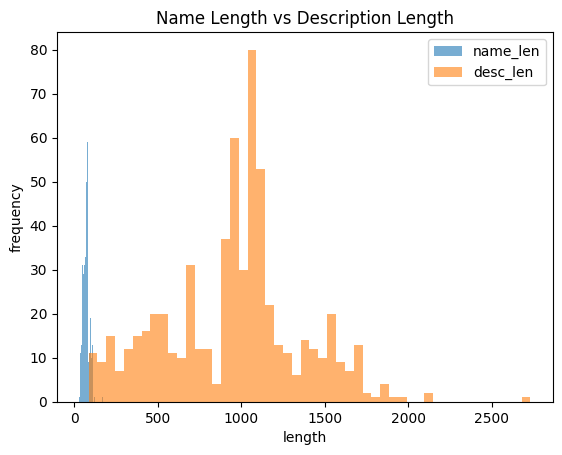

In [247]:
# Name length vs Description Length Visualization

plt.figure()
plt.hist(df['name_len'], bins=50, alpha=0.6, label='name_len')
plt.hist(df['desc_len'], bins=50, alpha=0.6, label='desc_len')
plt.legend()
plt.title('Name Length vs Description Length')
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

**Summary**

Berdasarkan hasil pengamatan terhadap panjang teks pada kolom `description` dan `name`, diperoleh beberapa temuan. Rata-rata panjang teks deskripsi berada pada kisaran 950 karakter, sedangkan rata-rata panjang teks name hanya sekitar 70 karakter. Hal ini menunjukkan bahwa sebagian besar informasi produk terkonsentrasi pada kolom description.

Untuk keperluan analisis lanjutan, ditetapkan threshold panjang teks deskripsi yaitu 900 karakter sebagai batas untuk mengklasifikasikan deskripsi ke dalam kategori teks panjang (long text) dan teks pendek (short text). Selain itu, panjang teks name konsisten berada di bawah 25% dari panjang teks deskripsi, sehingga perannya lebih bersifat pelengkap dibandingkan sebagai sumber informasi utama.

Berdasarkan temuan tersebut disimpulkan bahwa, kolom `description` lebih representatif dan informatif untuk digunakan sebagai sumber utama dalam proses ekstraksi fitur berbasis teks.

## **2. Quality and Coverage**

Pada bagian ini, kami melakukan analisis untuk menilai tingkat keinformatifan teks deskripsi produk. Evaluasi dilakukan dengan dua pendekatan utama, yaitu coverage dan quality. Coverage diukur berdasarkan sejauh mana teks deskripsi mampu mengandung informasi penting, seperti origin, process, roast level, dan flavor notes. Sementara itu, quality dianalisis dengan membandingkan hasil coverage tersebut terhadap panjang teks deskripsi, guna memahami hubungan antara kelengkapan informasi dan jumlah konten yang disediakan.

In [248]:
# Replace 'unknown' values with NaN

df = df.replace("unknown", np.nan)

In [249]:
# Column Data Presence Indicators
param_cols = ['origin', 'process', 'roast_level', 'notes']

for col in param_cols:
    df[f'has_{col}'] = df[col].notna().astype(int)

# Column Information Count    
has_cols = [f'has_{c}' for c in param_cols]
df['coverage_count'] = df[has_cols].sum(axis=1)

In [250]:
# Convert coverage_count into categorical data

def coverage_level(n):
    if n == 0:
        return 'no coverage'
    if n == 1:
        return 'very low coverage'
    if n == 2:
        return 'low coverage'
    if n == 3:
        return 'medium coverage'
    return 'full coverage'

df['coverage'] = df['coverage_count'].apply(coverage_level)

In [251]:
# Text Length Categorization

df['len_cat'] = np.where(df['desc_len'] >= 900, 'long', 'short')

In [252]:
# Text Quality

def text_quality(row):
    cov = row['coverage']
    length = row['len_cat']

    # FULL COVERAGE
    if cov == 'full coverage':
        return 'very good' if length == 'long' else 'excellent'

    # MEDIUM COVERAGE
    if cov == 'medium coverage':
        return 'good'

    # LOW COVERAGE
    if cov == 'low coverage':
        return 'average'

    # VERY LOW COVERAGE
    if cov == 'very low coverage':
        return 'very bad' if length == 'long' else 'average'

    # NO COVERAGE
    if cov == 'no coverage':
        return 'very poor' if length == 'long' else 'poor'

   
df['text_quality'] = df.apply(text_quality, axis=1)


In [253]:
# Text Information and Quality Summary

df[[
    'origin', 'process', 'roast_level', 'notes',
    'coverage_count', 'coverage',
    'desc_len', 'len_cat',
    'text_quality'
]]


,origin,process,roast_level,notes,coverage_count,coverage,desc_len,len_cat,text_quality
0,"colombia, toraja, flores","washed, natural",NaN,"fruity, sweet",3,medium coverage,683,short,good
1,ethiopia,washed,light,floral,4,full coverage,582,short,excellent
2,kenya,"washed, natural",NaN,sweet,3,medium coverage,796,short,good
3,ethiopia,"natural, anaerobic",NaN,"fruity, herbal",3,medium coverage,566,short,good
4,colombia,washed,NaN,sweet,3,medium coverage,779,short,good
...,...,...,...,...,...,...,...,...,...
1064,"indonesia, java, jawa, vietnam",NaN,"medium, dark","chocolate, sweet",3,medium coverage,1043,long,good
1065,"gayo, aceh, vietnam",NaN,"medium, dark","chocolate, fruity, sweet",3,medium coverage,1086,long,good
1066,"gayo, aceh, vietnam",NaN,medium,"chocolate, sweet",3,medium coverage,1093,long,good
1067,"jawa, vietnam",NaN,medium,sweet,3,medium coverage,1061,long,good


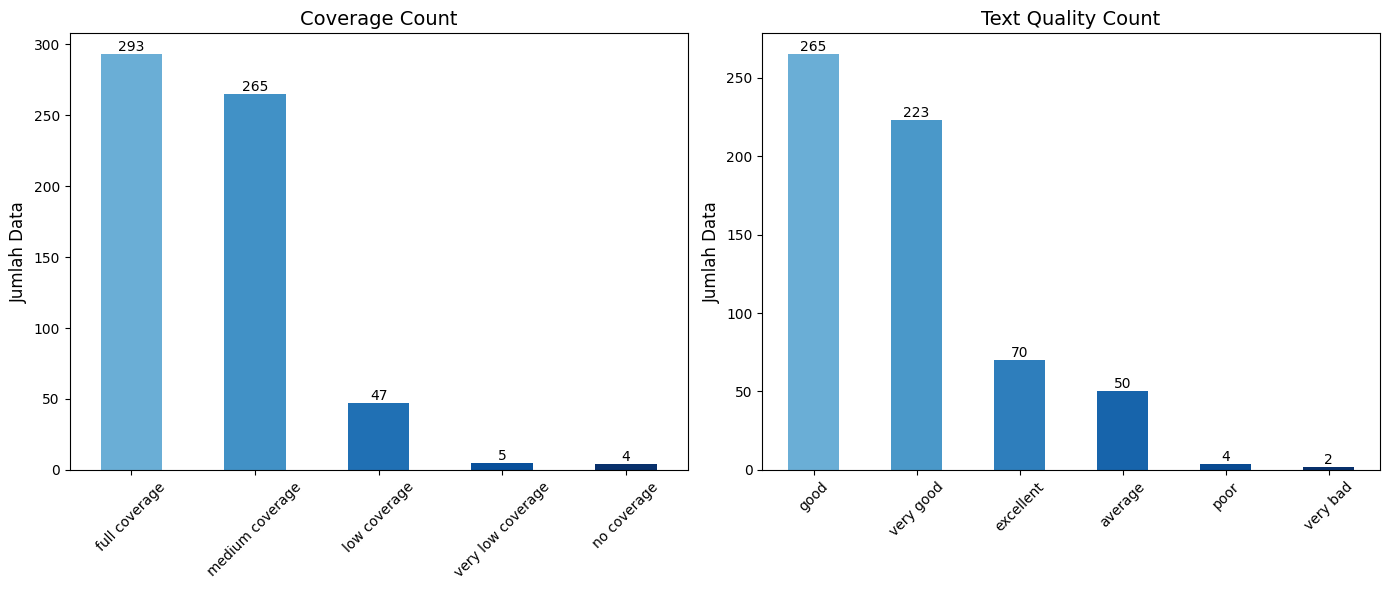

In [254]:
# Count the number of categories
coverage_count = df['coverage'].value_counts()
quality_count = df['text_quality'].value_counts()

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Coverage Count
n_cov = len(coverage_count)
colors_cov = cm.Blues(np.linspace(0.5, 1, n_cov))
coverage_count.plot(kind='bar', ax=axes[0], color=colors_cov)
axes[0].set_title('Coverage Count', fontsize=14)
axes[0].set_ylabel('Jumlah Data', fontsize=12)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

# Display the count labels above each bar
for p in axes[0].patches:
    axes[0].annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

# Text Quality Count
n_qual = len(quality_count)
colors_qual = cm.Blues(np.linspace(0.5, 1, n_qual))
quality_count.plot(kind='bar', ax=axes[1], color=colors_qual)
axes[1].set_title('Text Quality Count', fontsize=14)
axes[1].set_ylabel('Jumlah Data', fontsize=12)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)

# Display the count labels above each bar
for p in axes[1].patches:
    axes[1].annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()


**Summary**

Berdasarkan eksplorasi terhadap coverage **teks description** dan **text quality**, dapat disimpulkan bahwa, sebagian besar data termasuk full coverage dengan kualitas teks (text quality) bernilai good. Hal ini menunjukkan bahwa kolom deskripsi sudah memuat informasi penting seperti origin, process, roast level, dan notes. Data dengan label no coverage merupakan data dengan jumlah paling sedikit, sedangkan data dengan kualitas teks very bad dan poor hanya berjumlah dari 6 data.

Dengan demikian, dapat dikatakan bahwa dataset secara keseluruhan sudah cukup informatif dan layak digunakan sebagai dasar untuk pengolahan dan pengembangan model rekomendasi kopi.

## **3. Roastery Information**

Pada bagian ini, kami akan menampilkan eksplorasi untuk menilai tingkat informatif data berdasarkan roastery, dengan tujuan mengidentifikasi roastery mana yang menyediakan deskripsi produk paling lengkap dan kaya informasi.

In [255]:
# Convert text quality into numeric values

TEXT_QUALITY_SCORE = {
    'excellent': 5,
    'very good': 4,
    'good': 3,
    'average': 2,
    'poor': 1,
    'very poor': 0,
    'very bad': 0
}

df['text_quality_score'] = df['text_quality'].map(TEXT_QUALITY_SCORE)

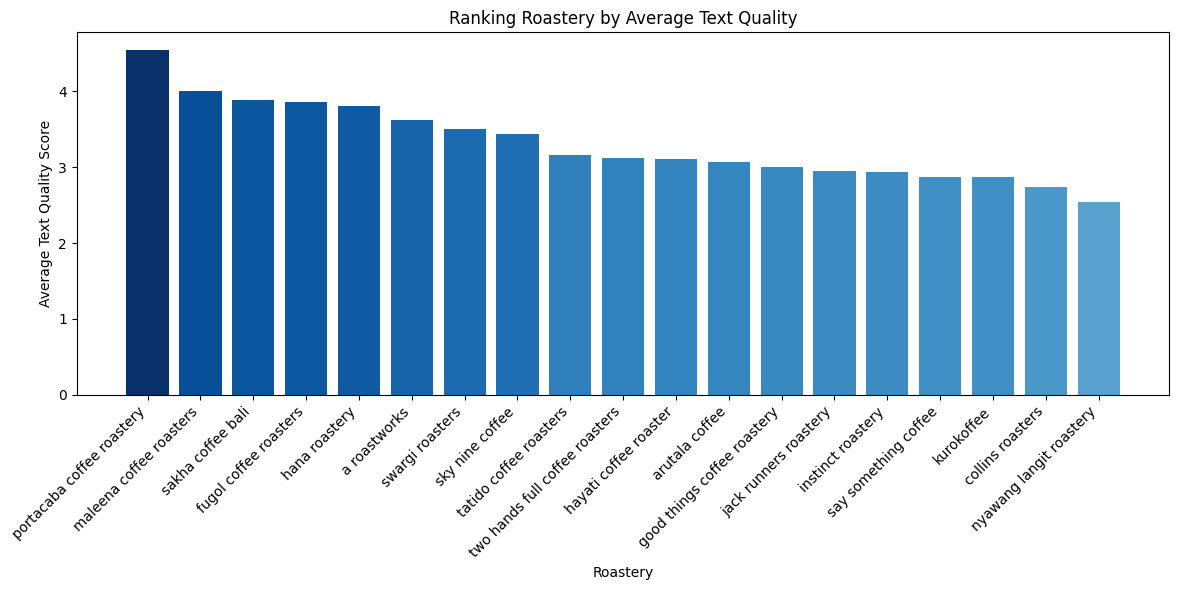

In [256]:
# Average Text Quality per Roastery
roastery_quality = (
    df
    .groupby('source', as_index=False)
    .agg(
        avg_text_quality=('text_quality_score', 'mean'),
        total_products=('text_quality_score', 'count')
    )
)

# Roastery Ranking by Text Quality
roastery_quality = roastery_quality.sort_values(
    by='avg_text_quality',
    ascending=False
)


# Roastery Ranking by Text Quality Visualization
colors = plt.cm.Blues(roastery_quality['avg_text_quality'] / roastery_quality['avg_text_quality'].max())

plt.figure(figsize=(12, 6))
plt.bar(
    roastery_quality['source'],
    roastery_quality['avg_text_quality'],
    color=colors 
)

plt.title('Ranking Roastery by Average Text Quality')
plt.xlabel('Roastery')
plt.ylabel('Average Text Quality Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

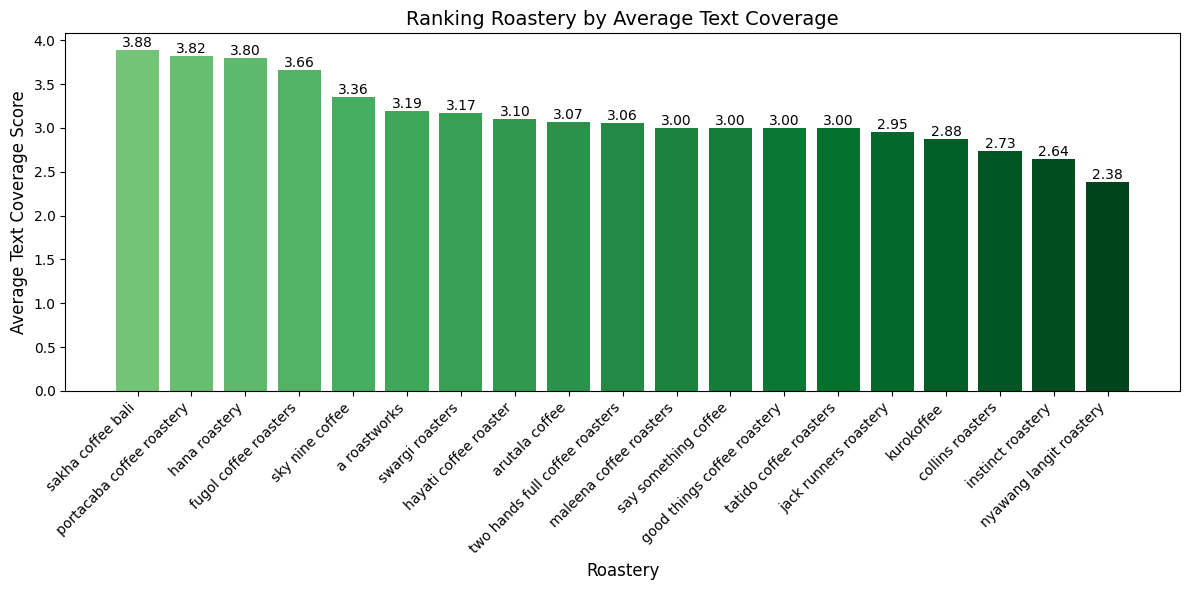

In [257]:
# Average Coverage per Roastery
roastery_coverage = (
    df
    .groupby('source', as_index=False)
    .agg(
        avg_text_coverage=('coverage_count', 'mean'),
        total_products=('coverage_count', 'count')
    )
)

# Roastery Ranking by Coverage
roastery_coverage = roastery_coverage.sort_values(
    by='avg_text_coverage',
    ascending=False
)

# Roastery Ranking by Coverage Visualization

sources = roastery_coverage['source']
scores = roastery_coverage['avg_text_coverage']
n = len(scores)
colors = cm.Greens(np.linspace(0.5, 1, n))


plt.figure(figsize=(12, 6))
bars = plt.bar(sources, scores, color=colors)

plt.title('Ranking Roastery by Average Text Coverage', fontsize=14)
plt.xlabel('Roastery', fontsize=12)
plt.ylabel('Average Text Coverage Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Bar Value Labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


**Summary**

Berdasarkan penyajian data dan analisis per roastery, diperoleh beberapa temuan penting. **Roastery Sakha** menempati posisi tertinggi untuk average text coverage, menunjukkan bahwa data dari Sakha Coffee Bali sangat lengkap dan informatif. Sementara itu, **Protacaba Coffee** memiliki text quality terbaik, yang menandakan bahwa deskripsi produk dari katalog roastery ini meskipun singkat, tetap padat dan sangat informatif. **Nyawang Langit Roastery** tercatat sebagai roastery dengan text quality dan coverage terendah, menandakan data deskripsinya kurang lengkap dan informatif.

Berdasarkan analisis ini, dalam proses pemodelan dapat diperhitungkan adanya asumsi bias terhadap Sakha Coffee Bali dan Protacaba Coffee, karena data dari kedua roastery tersebut lebih informatif dan mencakup hampir semua kebutuhan informasi untuk model rekomendasi kopi.

## **4. Notes, Origin, Process, Roast level**

Pada bagian ini, kami akan menampilkan data teratas berdasarkan Origin, Process, Notes, dan Roast Level. Tujuan dari analisis ini adalah untuk memberikan gambaran sejauh mana data yang mengandung parameter-parameter tersebut sudah cukup informatif. Selain itu, proses ini juga berfungsi sebagai tracing lanjutan untuk mengidentifikasi kemungkinan data yang parameter-parameternya tidak terdeteksi akibat keterbatasan pada proses ekstraksi sebelumnya.

### 4.1 Origin

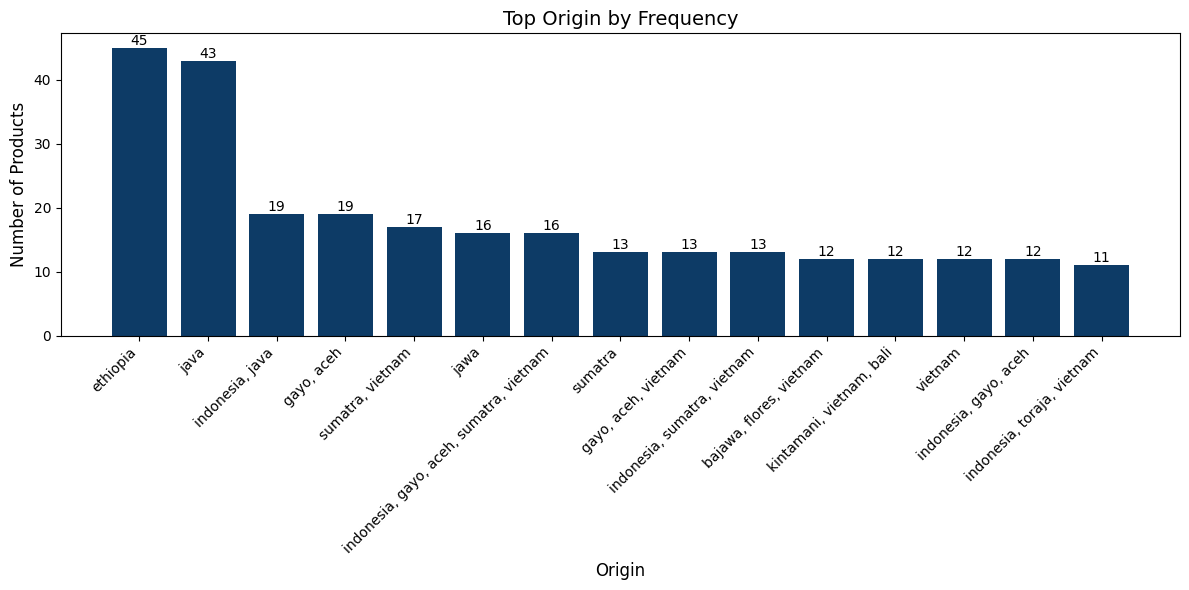

In [258]:
# Origin Count
origin_freq = (
    df['origin']
    .value_counts()
    .reset_index()
)

origin_freq.columns = ['origin', 'count']

top_n = 15
origin_freq = origin_freq.head(top_n)


# Top 15 Origin Visualization
sources = origin_freq['origin']
counts = origin_freq['count']

plt.figure(figsize=(12, 6))
bars = plt.bar(sources, counts, color='#0D3B66')

plt.title('Top Origin by Frequency', fontsize=14)
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

### 4.2 Process

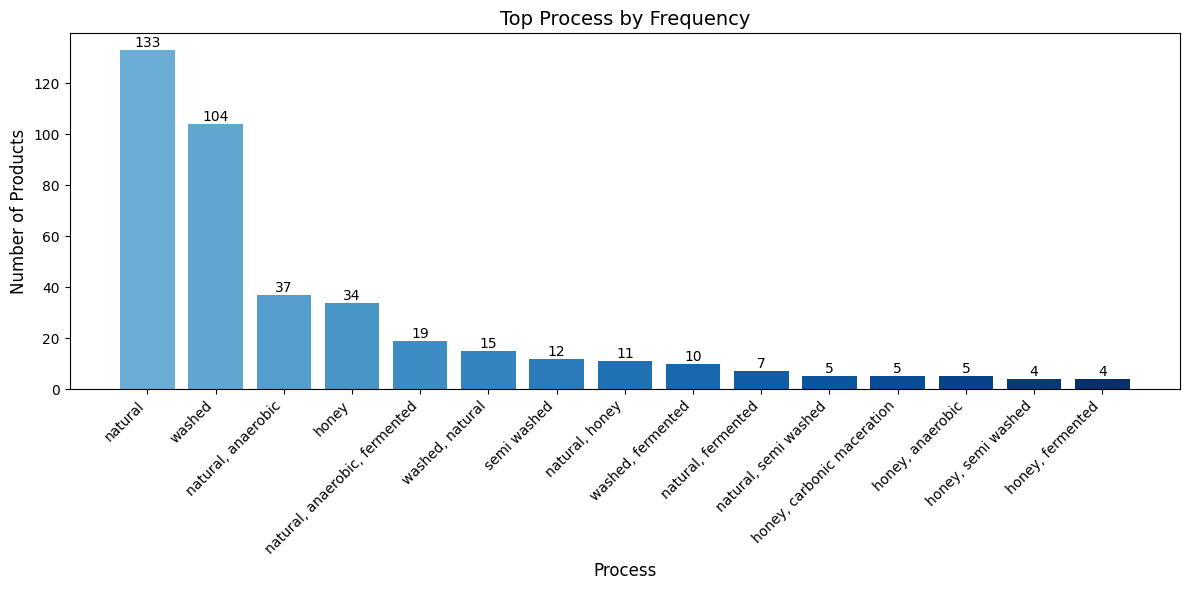

In [259]:
# Process Count
process_freq = (
    df['process']
    .value_counts()
    .reset_index()
)

process_freq.columns = ['process', 'count']

process_freq = process_freq.head(top_n)


# Top 15 Process Visualization
processes = process_freq['process']
counts = process_freq['count']
n = len(counts)

colors = cm.Blues(np.linspace(0.5, 1, n))

plt.figure(figsize=(12, 6))
bars = plt.bar(processes, counts, color=colors)

plt.title('Top Process by Frequency', fontsize=14)
plt.xlabel('Process', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


### 4.3 Notes

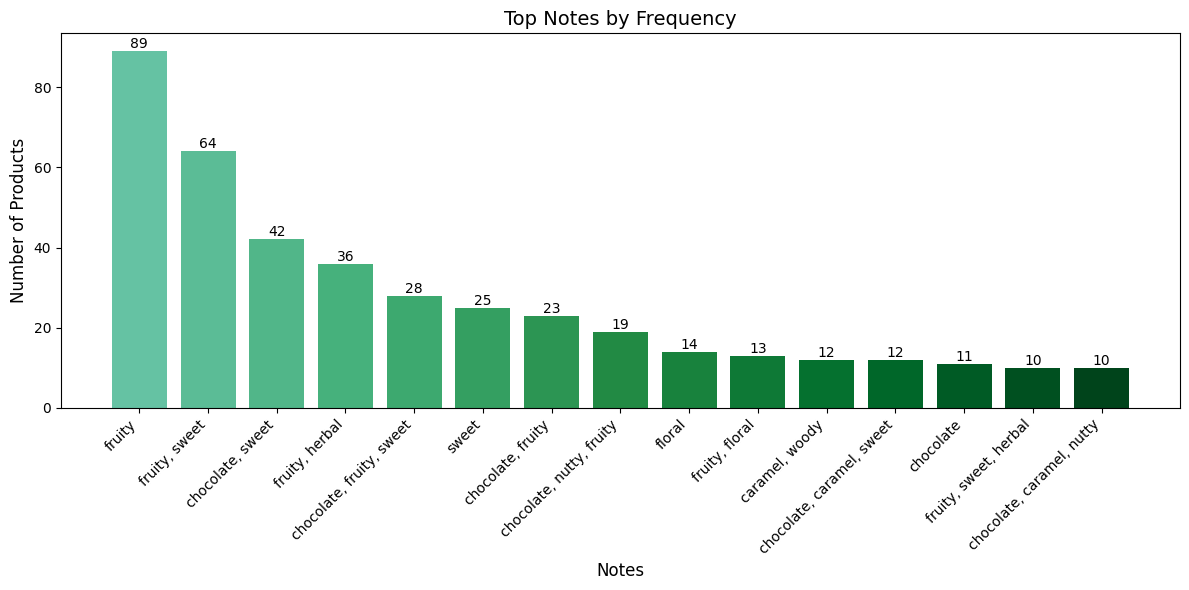

In [260]:
# Notes Count
notes_freq = (
    df['notes']
    .value_counts()
    .reset_index()
)

notes_freq.columns = ['notes', 'count']

notes_freq = notes_freq.head(top_n)


# Top 15 Notes Visualization
notes = notes_freq['notes']
counts = notes_freq['count']
n = len(counts)

colors = cm.BuGn(np.linspace(0.5, 1, n))

plt.figure(figsize=(12, 6))
bars = plt.bar(notes, counts, color=colors)

plt.title('Top Notes by Frequency', fontsize=14)
plt.xlabel('Notes', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


### 4.4 Roast Level

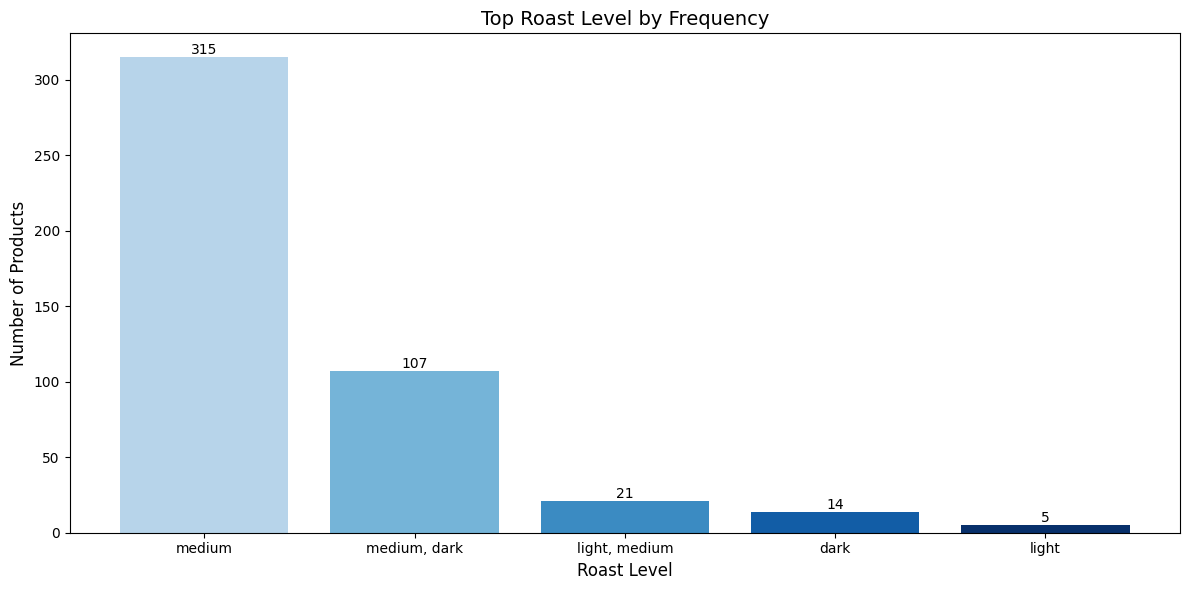

In [261]:
# Count Roast Level
roast_level_freq = (
    df['roast_level']
    .value_counts()
    .reset_index()
)

roast_level_freq.columns = ['roast_level', 'count']

# Top Roast Level Visualization
roast_levels = roast_level_freq['roast_level']
counts = roast_level_freq['count']
n = len(counts)

colors = cm.Blues(np.linspace(0.3, 1, n))

plt.figure(figsize=(12, 6))
bars = plt.bar(roast_levels, counts, color=colors)

plt.title('Top Roast Level by Frequency', fontsize=14)
plt.xlabel('Roast Level', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(ha='center')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


## **5. Arabica vs Robusta**

Pada bagian ini, kami akan melakukan perbandingan antara biji kopi Arabica dan Robusta berdasarkan dua aspek utama, yaitu rata-rata harga dan jumlah produk yang tersedia dalam katalog. Analisis ini bertujuan untuk memberikan gambaran distribusi harga serta representasi masing-masing jenis biji kopi dalam dataset.

In [262]:
# Separate Arabica and Robusta into a new DataFrame

df_arabica=df.loc[
    (df['name'].str.contains('arabica') |
    df['description'].str.contains('arabica'))|(df['name'].str.contains('arabika') |
    df['description'].str.contains('arabika'))
]

df_arabica

,source,name,price,description,origin,process,roast_level,notes,desc_len,name_len,has_origin,has_process,has_roast_level,has_notes,coverage_count,coverage,len_cat,text_quality,text_quality_score
12,instinct roastery,p blend instinct roastery biji kopi 200 gram,180000,please note before buying untuk permintaan dig...,NaN,NaN,NaN,NaN,464,47,0,0,0,0,0,no coverage,short,poor,1
16,fugol coffee roasters,kopi arabica ethiopia aricha adorsi specialty ...,85000,origin aricha gedeb ethiopia altitude 19002100...,ethiopia,natural,NaN,"floral, herbal",824,68,1,1,0,1,3,medium coverage,short,good,3
18,fugol coffee roasters,kopi arabica pangalengan anaerobic natural 1 k...,469000,origin pangalengan west java variety ateng sup...,java,"natural, anaerobic",medium,fruity,917,77,1,1,1,1,4,full coverage,long,very good,4
19,fugol coffee roasters,kopi arabica pangalengan anaerobic natural 500...,293000,origin pangalengan west java variety ateng sup...,java,"natural, anaerobic",medium,fruity,917,88,1,1,1,1,4,full coverage,long,very good,4
20,fugol coffee roasters,kopi arabica pangalengan anaerobic natural 200...,153000,origin pangalengan west java variety ateng sup...,java,"natural, anaerobic",medium,fruity,917,81,1,1,1,1,4,full coverage,long,very good,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,arutala coffee,arutala kopi flores bajawa arabika arabica cof...,79900,kenapa arutala coffee dengan memiliki roastery...,"bajawa, flores, vietnam",NaN,"medium, dark","chocolate, sweet",1084,64,1,0,1,1,3,medium coverage,long,good,3
1063,arutala coffee,arutala kopi arabika gayo luwak liar 200 gram ...,169900,kenapa arutala coffee dengan memiliki roastery...,"gayo, aceh, vietnam",NaN,medium,"fruity, sweet",1074,51,1,0,1,1,3,medium coverage,long,good,3
1065,arutala coffee,arutala kopi arabika gayo arabica coffee 200 g...,79900,kenapa arutala coffee dengan memiliki roastery...,"gayo, aceh, vietnam",NaN,"medium, dark","chocolate, fruity, sweet",1086,55,1,0,1,1,3,medium coverage,long,good,3
1067,arutala coffee,arutala kopi arabika jawa 200 gram bean,74900,kenapa arutala coffee dengan memiliki roastery...,"jawa, vietnam",NaN,medium,sweet,1061,40,1,0,1,1,3,medium coverage,long,good,3


In [263]:
# Remove Robusta entries from the Arabica DataFrame

df_arabica.drop(
    df_arabica[
        df_arabica.astype(str)
        .apply(
            lambda row:
                row.str.contains('robusta', case=False).any(),
            axis=1
        )
    ].index,
    inplace=True
)

df_arabica

,source,name,price,description,origin,process,roast_level,notes,desc_len,name_len,has_origin,has_process,has_roast_level,has_notes,coverage_count,coverage,len_cat,text_quality,text_quality_score
12,instinct roastery,p blend instinct roastery biji kopi 200 gram,180000,please note before buying untuk permintaan dig...,NaN,NaN,NaN,NaN,464,47,0,0,0,0,0,no coverage,short,poor,1
16,fugol coffee roasters,kopi arabica ethiopia aricha adorsi specialty ...,85000,origin aricha gedeb ethiopia altitude 19002100...,ethiopia,natural,NaN,"floral, herbal",824,68,1,1,0,1,3,medium coverage,short,good,3
18,fugol coffee roasters,kopi arabica pangalengan anaerobic natural 1 k...,469000,origin pangalengan west java variety ateng sup...,java,"natural, anaerobic",medium,fruity,917,77,1,1,1,1,4,full coverage,long,very good,4
19,fugol coffee roasters,kopi arabica pangalengan anaerobic natural 500...,293000,origin pangalengan west java variety ateng sup...,java,"natural, anaerobic",medium,fruity,917,88,1,1,1,1,4,full coverage,long,very good,4
20,fugol coffee roasters,kopi arabica pangalengan anaerobic natural 200...,153000,origin pangalengan west java variety ateng sup...,java,"natural, anaerobic",medium,fruity,917,81,1,1,1,1,4,full coverage,long,very good,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,arutala coffee,arutala kopi flores bajawa arabika arabica cof...,79900,kenapa arutala coffee dengan memiliki roastery...,"bajawa, flores, vietnam",NaN,"medium, dark","chocolate, sweet",1084,64,1,0,1,1,3,medium coverage,long,good,3
1063,arutala coffee,arutala kopi arabika gayo luwak liar 200 gram ...,169900,kenapa arutala coffee dengan memiliki roastery...,"gayo, aceh, vietnam",NaN,medium,"fruity, sweet",1074,51,1,0,1,1,3,medium coverage,long,good,3
1065,arutala coffee,arutala kopi arabika gayo arabica coffee 200 g...,79900,kenapa arutala coffee dengan memiliki roastery...,"gayo, aceh, vietnam",NaN,"medium, dark","chocolate, fruity, sweet",1086,55,1,0,1,1,3,medium coverage,long,good,3
1067,arutala coffee,arutala kopi arabika jawa 200 gram bean,74900,kenapa arutala coffee dengan memiliki roastery...,"jawa, vietnam",NaN,medium,sweet,1061,40,1,0,1,1,3,medium coverage,long,good,3


In [264]:
# Verify that df_arabica contains no Robusta products

df_arabica.loc[
    df_arabica['name'].str.contains('robusta') |
    df_arabica['description'].str.contains('robusta')
]

,source,name,price,description,origin,process,roast_level,notes,desc_len,name_len,has_origin,has_process,has_roast_level,has_notes,coverage_count,coverage,len_cat,text_quality,text_quality_score


In [265]:
# Create df_robusta containing Robusta products

df_robusta=df.loc[
    df['name'].str.contains('robusta') |
    df['description'].str.contains('robusta')
]

df_robusta

,source,name,price,description,origin,process,roast_level,notes,desc_len,name_len,has_origin,has_process,has_roast_level,has_notes,coverage_count,coverage,len_cat,text_quality,text_quality_score
88,fugol coffee roasters,espresso kopi susu special robusta 10 kg grosi...,158999,pirt 308327347034727 harap membaca keterangan ...,temanggung,NaN,medium,sweet,491,63,1,0,1,1,3,medium coverage,short,good,3
89,fugol coffee roasters,espresso kopi susu special robusta 5 kg grosir...,178000,pirt 308327347034727 harap membaca keterangan ...,temanggung,NaN,medium,sweet,489,62,1,0,1,1,3,medium coverage,short,good,3
178,fugol coffee roasters,biji kopi 1 kg robusta es kopi susu harga hema...,176000,halo great people kami ucapkan terima kasih at...,NaN,NaN,dark,sweet,1190,83,0,0,1,1,2,low coverage,long,average,2
213,fugol coffee roasters,espresso kopi susu special 500gr robusta bijib...,110000,halal id32110016691860324 penting semua pesana...,"indonesia, jawa, temanggung",NaN,medium,sweet,467,63,1,0,1,1,3,medium coverage,short,good,3
214,fugol coffee roasters,espresso kopi susu special 200gr robusta bijib...,65000,halal id32110016691860324 penting semua pesana...,"indonesia, jawa, temanggung",NaN,medium,sweet,467,56,1,0,1,1,3,medium coverage,short,good,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,arutala coffee,arutala kopi vietnam central highland robusta ...,54900,kenapa arutala coffee dengan memiliki roastery...,vietnam,NaN,medium,"chocolate, caramel, nutty",1065,60,1,0,1,1,3,medium coverage,long,good,3
1051,arutala coffee,arutala kopi aroma blend 200 gram biji,54900,kenapa arutala coffee dengan memiliki roastery...,vietnam,NaN,medium,"chocolate, caramel, sweet",1083,39,1,0,1,1,3,medium coverage,long,good,3
1056,arutala coffee,arutala kopi toraja rantebua robusta coffee in...,54900,kenapa arutala coffee dengan memiliki roastery...,"indonesia, toraja, vietnam",NaN,"medium, dark","chocolate, sweet",1051,66,1,0,1,1,3,medium coverage,long,good,3
1064,arutala coffee,arutala kopi robusta jawa java coffee indonesi...,54900,kenapa arutala coffee dengan memiliki roastery...,"indonesia, java, jawa, vietnam",NaN,"medium, dark","chocolate, sweet",1043,62,1,0,1,1,3,medium coverage,long,good,3


In [266]:
# Drop Arabica/arabika data from the df_robusta

keys=['arabica','arabika']
pattern = '|'.join(keys)

df_robusta.drop(
    df_robusta[
        df_robusta.astype(str)
        .apply(
            lambda row:
                row.str.contains(pattern,regex=True).any(),
            axis=1
        )
    ].index,
    inplace=True
)

df_robusta

,source,name,price,description,origin,process,roast_level,notes,desc_len,name_len,has_origin,has_process,has_roast_level,has_notes,coverage_count,coverage,len_cat,text_quality,text_quality_score
88,fugol coffee roasters,espresso kopi susu special robusta 10 kg grosi...,158999,pirt 308327347034727 harap membaca keterangan ...,temanggung,NaN,medium,sweet,491,63,1,0,1,1,3,medium coverage,short,good,3
89,fugol coffee roasters,espresso kopi susu special robusta 5 kg grosir...,178000,pirt 308327347034727 harap membaca keterangan ...,temanggung,NaN,medium,sweet,489,62,1,0,1,1,3,medium coverage,short,good,3
178,fugol coffee roasters,biji kopi 1 kg robusta es kopi susu harga hema...,176000,halo great people kami ucapkan terima kasih at...,NaN,NaN,dark,sweet,1190,83,0,0,1,1,2,low coverage,long,average,2
213,fugol coffee roasters,espresso kopi susu special 500gr robusta bijib...,110000,halal id32110016691860324 penting semua pesana...,"indonesia, jawa, temanggung",NaN,medium,sweet,467,63,1,0,1,1,3,medium coverage,short,good,3
214,fugol coffee roasters,espresso kopi susu special 200gr robusta bijib...,65000,halal id32110016691860324 penting semua pesana...,"indonesia, jawa, temanggung",NaN,medium,sweet,467,56,1,0,1,1,3,medium coverage,short,good,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,arutala coffee,arutala kopi vietnam central highland robusta ...,54900,kenapa arutala coffee dengan memiliki roastery...,vietnam,NaN,medium,"chocolate, caramel, nutty",1065,60,1,0,1,1,3,medium coverage,long,good,3
1051,arutala coffee,arutala kopi aroma blend 200 gram biji,54900,kenapa arutala coffee dengan memiliki roastery...,vietnam,NaN,medium,"chocolate, caramel, sweet",1083,39,1,0,1,1,3,medium coverage,long,good,3
1056,arutala coffee,arutala kopi toraja rantebua robusta coffee in...,54900,kenapa arutala coffee dengan memiliki roastery...,"indonesia, toraja, vietnam",NaN,"medium, dark","chocolate, sweet",1051,66,1,0,1,1,3,medium coverage,long,good,3
1064,arutala coffee,arutala kopi robusta jawa java coffee indonesi...,54900,kenapa arutala coffee dengan memiliki roastery...,"indonesia, java, jawa, vietnam",NaN,"medium, dark","chocolate, sweet",1043,62,1,0,1,1,3,medium coverage,long,good,3


cek apakah masih terdapat data yang mengandung kata arabika atau arabica

In [267]:
# # Verify that df_robusta contains no Arabica products

df_robusta.loc[
    df_robusta['name'].str.contains(pattern) |
    df_robusta['description'].str.contains(pattern)
]

,source,name,price,description,origin,process,roast_level,notes,desc_len,name_len,has_origin,has_process,has_roast_level,has_notes,coverage_count,coverage,len_cat,text_quality,text_quality_score


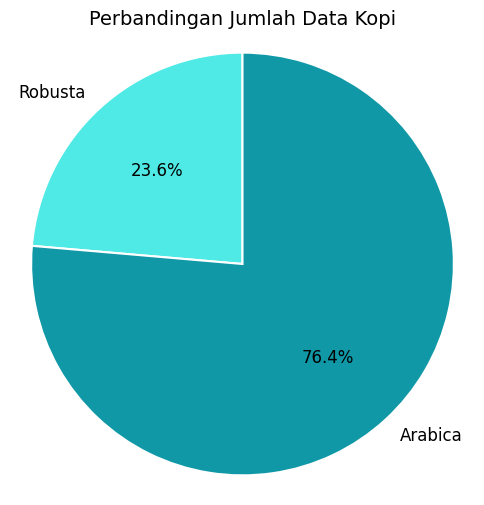

In [268]:
# Robusta vs Arabica Comparison Visualization

labels = ['Robusta', 'Arabica']
counts = [len(df_robusta), len(df_arabica)]

colors = ["#4FEAE5", "#1098A7"]

plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize':12}
)
plt.title('Perbandingan Jumlah Data Kopi', fontsize=14)
plt.axis('equal')
plt.show()

Berdasarkan perbandingan jumlah data antara Arabica dan Robusta, terlihat bahwa produk Arabica mendominasi katalog, dengan selisih jumlah sekitar 85% lebih banyak dibandingkan Robusta. Hal ini menunjukkan bahwa roastery-roastery dalam dataset kami cenderung memproduksi biji kopi Arabica. Hal ini juga dapat mengindikasikan tingginya permintaan pasar untuk kopi Arabica, serta varietas dan jenis kopi Arabica yang lebih beragam dibandingkan dengan Robusta.

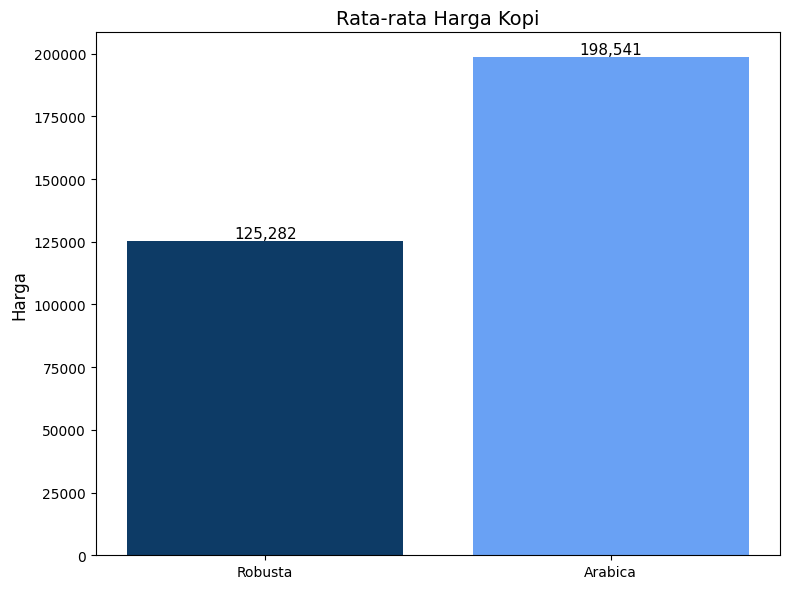

In [269]:
# Average Prices Comparison Visualization

labels = ['Robusta', 'Arabica']
avg_prices = [
    df_robusta['price'].mean(),
    df_arabica['price'].mean(),
]
colors = ['#0D3B66', '#69A1F4']

plt.figure(figsize=(8,6))
bars = plt.bar(labels, avg_prices, color=colors)

plt.title('Rata-rata Harga Kopi', fontsize=14)
plt.ylabel('Harga', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.tight_layout()
plt.show()

Berdasarkan visualisasi perbandingan rata-rata harga kopi Arabica dan Robusta, terlihat bahwa kopi Arabica memiliki harga rata-rata lebih tinggi, dengan selisih sekitar Rp73.259. Hal ini dapat menunjukkan bahwa variasi biji Arabica memiliki nilai yang lebih tinggi, didukung oleh jumlah produk Arabica yang lebih banyak serta rata-rata harga yang tetap unggul dibandingkan Robusta.

Hal ini juga mengindikasikan bahwa apresiasi dan permintaan masyarakat terhadap Arabica lebih tinggi, serta proses produksi biji Arabica cenderung lebih kompleks, terlihat dari variasi harga yang cukup besar dan persebaran data yang luas. Sebaliknya, biji Robusta memiliki jumlah produk yang lebih sedikit, rata-rata harga lebih rendah, dan permintaan pasar yang relatif lebih rendah, sesuai dengan domain knowledge bahwa minat konsumen terhadap Robusta memang lebih rendah dibandingkan Arabica.

### **- Arabica Product Exploration**

Pada bagian ini, kami akan melakukan eksplorasi lebih mendalam terhadap produk kopi jenis Arabica. Analisis ini akan menampilkan harga termurah dan termahal, sekaligus memberikan range harga per 100 gram, untuk memberikan gambaran mengenai variasi harga dan potensi strategi penetapan harga produk Arabica.

In [270]:
# Weight Extraction

df_arabica['quantity'] = np.nan
quantity_patterns = {
    100: r'\b100\s*(g|gr|gram)\b',
    150: r'\b150\s*(g|gr|gram)\b',
    200: r'\b200\s*(g|gr|gram)\b',
    400: r'\b400\s*(g|gr|gram)\b',
    500: r'\b500\s*(g|gr|gram)\b',
    1000: r'\b(1000\s*(g|gr|gram)|1\s*kg)\b'
}

for qty, pattern in quantity_patterns.items():
    mask = (
        df_arabica['quantity'].isna() &
        df_arabica[['name', 'description']]
        .astype(str)
        .apply(
            lambda r: r.str.contains(pattern, case=False, regex=True).any(),
            axis=1
        )
    )

    df_arabica.loc[mask, 'quantity'] = qty

In [271]:
# Quantity Mismatch Filtering

def extract_gram_only(row):
    text = f"{row.get('name', '')} {row.get('description', '')}".lower()

    if re.search(r'\b(l|liter|ml|milliliter|sachet)\b', text):
        return np.nan

    match = re.search(r'\b(\d+)\s*(kg|g|gr|gram)\b', text)
    if not match:
        return np.nan

    value = int(match.group(1))
    unit = match.group(2)

    return value * 1000 if unit == 'kg' else value


mask_null = df_arabica['quantity'].isna()

df_arabica.loc[mask_null, 'quantity'] = (
    df_arabica.loc[mask_null]
    .apply(extract_gram_only, axis=1)
)

In [272]:
# Price per Gram Calculation

arabica_product = (
    df_arabica
    .dropna(subset=['quantity'])
    .copy()
)

arabica_product['price_gram'] = round(arabica_product['price'] / arabica_product['quantity'])

arabica_product.describe()

,price,desc_len,name_len,has_origin,has_process,has_roast_level,has_notes,coverage_count,text_quality_score,quantity,price_gram
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,198940.746711,1006.855263,73.358553,0.970395,0.720395,0.894737,0.924342,3.509868,3.641447,389.032895,923.934211
std,137530.101376,369.774401,20.364169,0.169775,0.449545,0.307398,0.264886,0.679668,0.795859,693.264963,1132.536929
min,25000.000000,147.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,40.000000
25%,81000.000000,878.750000,57.000000,1.000000,0.000000,1.000000,1.000000,3.000000,3.000000,100.000000,421.500000
50%,155500.000000,993.000000,74.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,200.000000,579.000000
75%,298000.000000,1151.750000,83.250000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,500.000000,810.000000
max,660000.000000,2101.000000,171.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,10000.000000,10000.000000


In [273]:
# Exclude drip bag products because packaging and quantity make them incompatible with the 100g scoring criteria

arabica_product.drop(
    arabica_product[
        arabica_product.astype(str)
        .apply(
            lambda row:
                row.str.contains('drip bag').any(),
            axis=1
        )
    ].index,
    inplace=True
)

Data yang mengandung kata drip bag tidak akan digunakan karena secara berat produk tidak sesuai dengan scoring parameter yang akan digunakan yaitu 100 gram.

#### **Top 5 Arabica termahal**

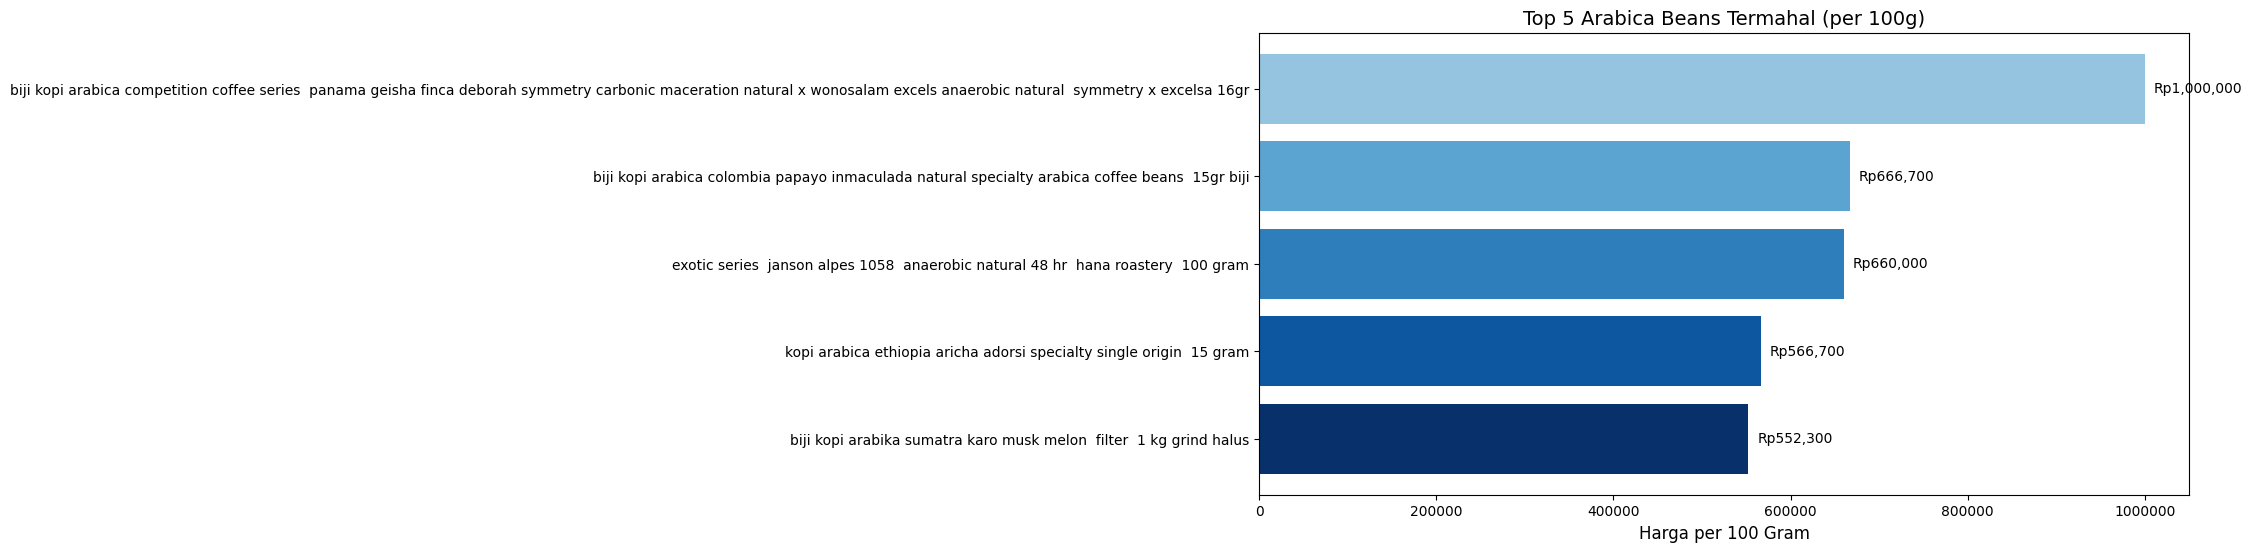

In [274]:
# Create a column for price per 100 grams

arabica_product['price_100g'] = arabica_product['price_gram'] * 100

# Top 5 Most Expensive Beans
arabica_product.sort_values('price_100g', ascending=False).head()

# Top 5 Most Expensive Beans Visualization 
top5_arabica = (
    arabica_product
    .sort_values('price_100g', ascending=False)
    .head(5)
)

names = top5_arabica['name']
prices = top5_arabica['price_100g']
n = len(prices)

colors = cm.Blues(np.linspace(0.4, 1, n))

plt.figure(figsize=(12, 6))
bars = plt.barh(names, prices, color=colors)
plt.xlabel('Harga per 100 Gram', fontsize=12)
plt.title('Top 5 Arabica Beans Termahal (per 100g)', fontsize=14)
plt.gca().invert_yaxis() 
plt.ticklabel_format(style='plain', axis='x')

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max(prices)*0.01,
        bar.get_y() + bar.get_height()/2,
        f'Rp{int(width):,}',
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

**Summary**

Berdasarkan hasil analisis, dapat dilihat bahwa Top 5 Arabica Beans Termahal didominasi oleh biji kopi yang berasal dari Amerika Selatan (Colombia dan Panama). Sementara itu, biji kopi lokal Indonesia berasal dari origin Sumatra Karo dengan notes musk melon. Hal ini menunjukkan bahwa biji kopi dari Amerika Selatan memiliki harga yang sangat tinggi, bahkan menyentuh Rp1.000.000 per 100 gram, yang mengindikasikan bahwa produk tersebut memiliki apresiasi dan permintaan yang sangat baik di kalangan konsumen. Berdasarkan data katalog kami, hal ini dapat dijadikan indikator rekomendasi beans terbaik.

Selain itu, berdasarkan domain knowledge, biji Arabica dengan grade Geisha dan varian Exotic juga termasuk kopi terbaik berskala internasional, karena kombinasi varietas biji kopi yang unggul serta proses before roasting yang kompleks, seperti contoh Panama Geisha Finca Deborah yang menggunakan metode carbonic maceration natural.

#### **Top 5 Arabica termurah**

In [275]:
# Top 5 Cheapest Beans
arabica_product.sort_values('price_100g', ascending=True).head()

,source,name,price,description,origin,process,roast_level,notes,desc_len,name_len,...,has_roast_level,has_notes,coverage_count,coverage,len_cat,text_quality,text_quality_score,quantity,price_gram,price_100g
22,fugol coffee roasters,biji kopi arabica ethiopia floral espresso ble...,398000,halal id32110016691860324 penting semua pesana...,ethiopia,NaN,medium,"fruity, floral, sweet",439,67,...,1,1,3,medium coverage,short,good,3,10000.0,40.0,4000.0
87,fugol coffee roasters,biji kopi es kopi susu 5 kg grosir espresso ar...,204999,halal id32110016691860324 harap membaca ketera...,NaN,NaN,"medium, dark","chocolate, fruity",699,73,...,1,1,2,low coverage,short,average,2,5000.0,41.0,4100.0
639,jack runners roastery,green beans biji kopi arabica gayo fullwash sp...,236000,produk ini adalah kopi mentah belum disangrai...,gayo,"washed, natural",NaN,"fruity, sweet",2101,61,...,0,1,3,medium coverage,long,good,3,1000.0,236.0,23600.0
638,jack runners roastery,green beans biji kopi arabica gayo wine specialty,260000,produk ini adalah kopi mentah belum disangrai...,"gayo, aceh, sumatra",fermented,dark,"chocolate, caramel, fruity, floral",2097,49,...,1,1,4,full coverage,long,very good,4,1000.0,260.0,26000.0
363,swargi roasters,mid grade espresso malt crema 100 arabica 200 gr,65000,malt crema beans yang diroasting khusus untuk ...,java,"natural, fermented",medium,"chocolate, nutty",414,49,...,1,1,4,full coverage,short,excellent,5,200.0,325.0,32500.0


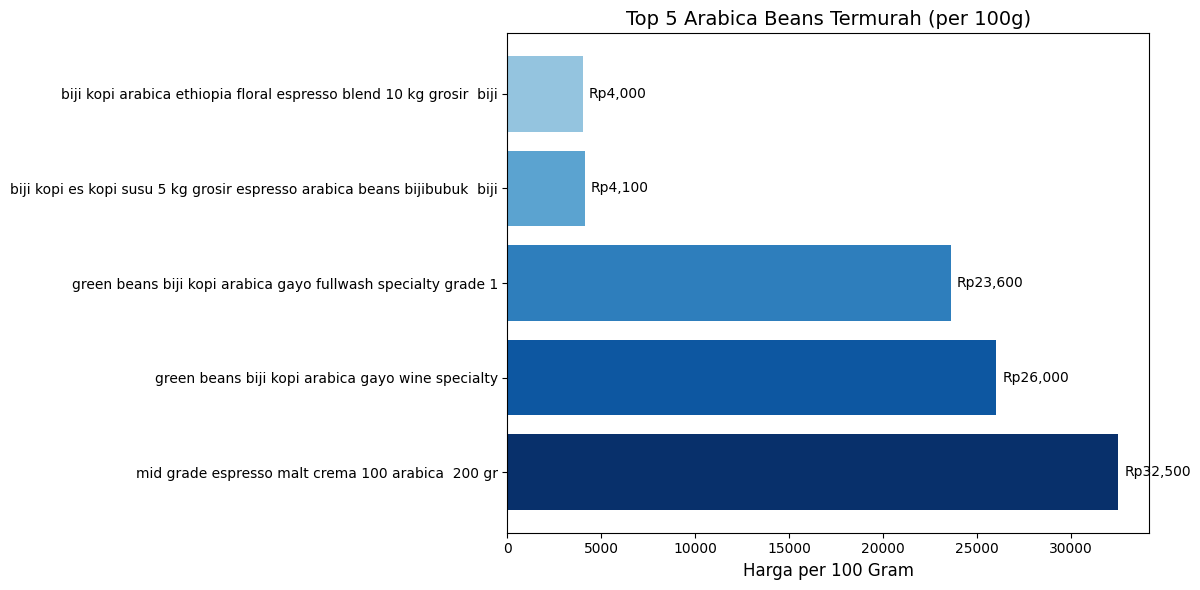

In [276]:
# Top 5 Cheapest Beans Visualization
low5_arabica = (
    arabica_product
    .sort_values('price_100g', ascending=True)
    .head(5)
)

names = low5_arabica['name']
prices = low5_arabica['price_100g']
n = len(prices)

colors = cm.Blues(np.linspace(0.4, 1, n))

plt.figure(figsize=(12, 6))
bars = plt.barh(names, prices, color=colors)
plt.xlabel('Harga per 100 Gram', fontsize=12)
plt.title('Top 5 Arabica Beans Termurah (per 100g)', fontsize=14)
plt.gca().invert_yaxis() 
plt.ticklabel_format(style='plain', axis='x')

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max(prices)*0.01,
        bar.get_y() + bar.get_height()/2,
        f'Rp{int(width):,}',
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

**Summary**

Di sisi lain, Top 5 Arabica Beans Termurah didominasi oleh biji kopi untuk espresso brew. Hal ini menunjukkan bahwa biji Arabica untuk espresso umumnya memiliki grade lebih rendah dibandingkan kelas biji Arabica lainnya. Selain itu, kuantitas penjualan biji ini juga relatif besar, menandakan tingginya distribusi produk.

Berdasarkan domain knowledge, biji Arabica untuk espresso cenderung memiliki grade lebih rendah karena hasil seduhan espresso biasanya lebih flat dibandingkan metode manual brewing, yang menawarkan kompleksitas rasa lebih tinggi. Oleh karena itu, biji untuk espresso tetap ekonomis namun tetap memenuhi standar produksi untuk konsumsi massal.

### **- Robusta Product Exploration**

In [277]:
# Extract Quantity

df_robusta['quantity'] = np.nan
quantity_patterns = {
    100: r'\b100\s*(g|gr|gram)\b',
    150: r'\b150\s*(g|gr|gram)\b',
    200: r'\b200\s*(g|gr|gram)\b',
    400: r'\b400\s*(g|gr|gram)\b',
    500: r'\b500\s*(g|gr|gram)\b',
    1000: r'\b(1000\s*(g|gr|gram)|1\s*kg)\b'
}

for qty, pattern in quantity_patterns.items():
    mask = (
        df_robusta['quantity'].isna() &
        df_robusta[['name', 'description']]
        .astype(str)
        .apply(
            lambda r: r.str.contains(pattern, case=False, regex=True).any(),
            axis=1
        )
    )

    df_robusta.loc[mask, 'quantity'] = qty

In [ ]:
# Impute missing quantity values

mask_null = df_robusta['quantity'].isna()

df_robusta.loc[mask_null, 'quantity'] = (
    df_robusta.loc[mask_null]
    .apply(extract_gram_only, axis=1)
)

In [ ]:
# Create a clean Robusta dataset

robusta_product = (
    df_robusta
    .dropna(subset=['quantity'])
    .copy()
)

robusta_product['price_gram'] = round(robusta_product['price'] / robusta_product['quantity'])

In [ ]:
# Remove drip bag products

robusta_product.drop(
    robusta_product[
        robusta_product.astype(str)
        .apply(
            lambda row:
                row.str.contains('drip bag').any(),
            axis=1
        )
    ].index,
    inplace=True
)

In [288]:
# Pure Robusta Beans for Analysis

keywords=['drip', 'capsule','hampers','gift box','arabika']

robusta_product.drop(
    robusta_product[
        robusta_product.astype(str)
        .apply(
            lambda row:
                row.str.contains('|'.join(keywords), case=False, regex=True).any(),
            axis=1
        )
    ].index,
    inplace=True
)

# Statistic Descriptive Analysis
robusta_product.describe()

,price,desc_len,name_len,has_origin,has_process,has_roast_level,has_notes,coverage_count,text_quality_score,quantity,price_gram,price_100g
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,132480.285714,727.428571,69.142857,0.785714,0.357143,0.785714,0.714286,2.642857,2.642857,1353.571429,460.142857,46014.285714
std,51025.734220,290.456329,17.037773,0.425815,0.497245,0.425815,0.468807,0.928783,1.446861,2797.558296,318.360187,31836.018720
min,40900.000000,334.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,100.000000,16.000000,1600.000000
25%,110000.000000,472.500000,58.250000,1.000000,0.000000,1.000000,0.250000,2.000000,2.000000,200.000000,213.250000,21325.000000
50%,134250.000000,692.000000,63.000000,1.000000,0.000000,1.000000,1.000000,3.000000,3.000000,200.000000,479.500000,47950.000000
75%,172000.000000,965.000000,81.500000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,812.500000,631.750000,63175.000000
max,220000.000000,1190.000000,106.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,10000.000000,1100.000000,110000.000000


#### **Top 5 robusta termahal**

In [289]:
# Price per 100g Calculation
robusta_product['price_100g'] = robusta_product['price_gram'] * 100

# Top 5 Most Expensive Robusta Products
robusta_product.sort_values('price_100g', ascending=False).head()

,source,name,price,description,origin,process,roast_level,notes,desc_len,name_len,...,has_roast_level,has_notes,coverage_count,coverage,len_cat,text_quality,text_quality_score,quantity,price_gram,price_100g
805,hana roastery,blend es kopi susu 100 fine robusta 200 gram...,220000,blend es kopi susu 100 fine robusta biji espr...,NaN,NaN,medium,"chocolate, caramel, nutty, sweet",1152,73,...,1,1,2,low coverage,long,average,2,200.0,1100.0,110000.0
217,fugol coffee roasters,espresso kopi susu special 1kg robusta bijibub...,180000,halal id32110016691860324 penting semua pesana...,"indonesia, jawa, temanggung",NaN,medium,sweet,467,54,...,1,1,3,medium coverage,short,good,3,200.0,900.0,90000.0
587,say something coffee,paket biji kopi reguler 200 gram espresso 2 ...,133500,paket biji kopi espresso reguler 200 gram vari...,"java, sumatra, jawa, temanggung",NaN,NaN,NaN,1089,62,...,0,0,1,very low coverage,long,very bad,0,200.0,668.0,66800.0
239,a roastworks,indonesia south sulawesi malino topidi robusta...,160000,espresso indonesia south sulawesi malino topid...,indonesia,natural,medium,fruity,711,106,...,1,1,4,full coverage,short,excellent,5,250.0,640.0,64000.0
678,maleena coffee roasters,classic robusta 100 coffee ground beans indo...,121325,classic robusta 100 coffee ground roasted cof...,"indonesia, java",natural,"medium, dark","chocolate, sweet, spicy",334,77,...,1,1,4,full coverage,short,excellent,5,200.0,607.0,60700.0


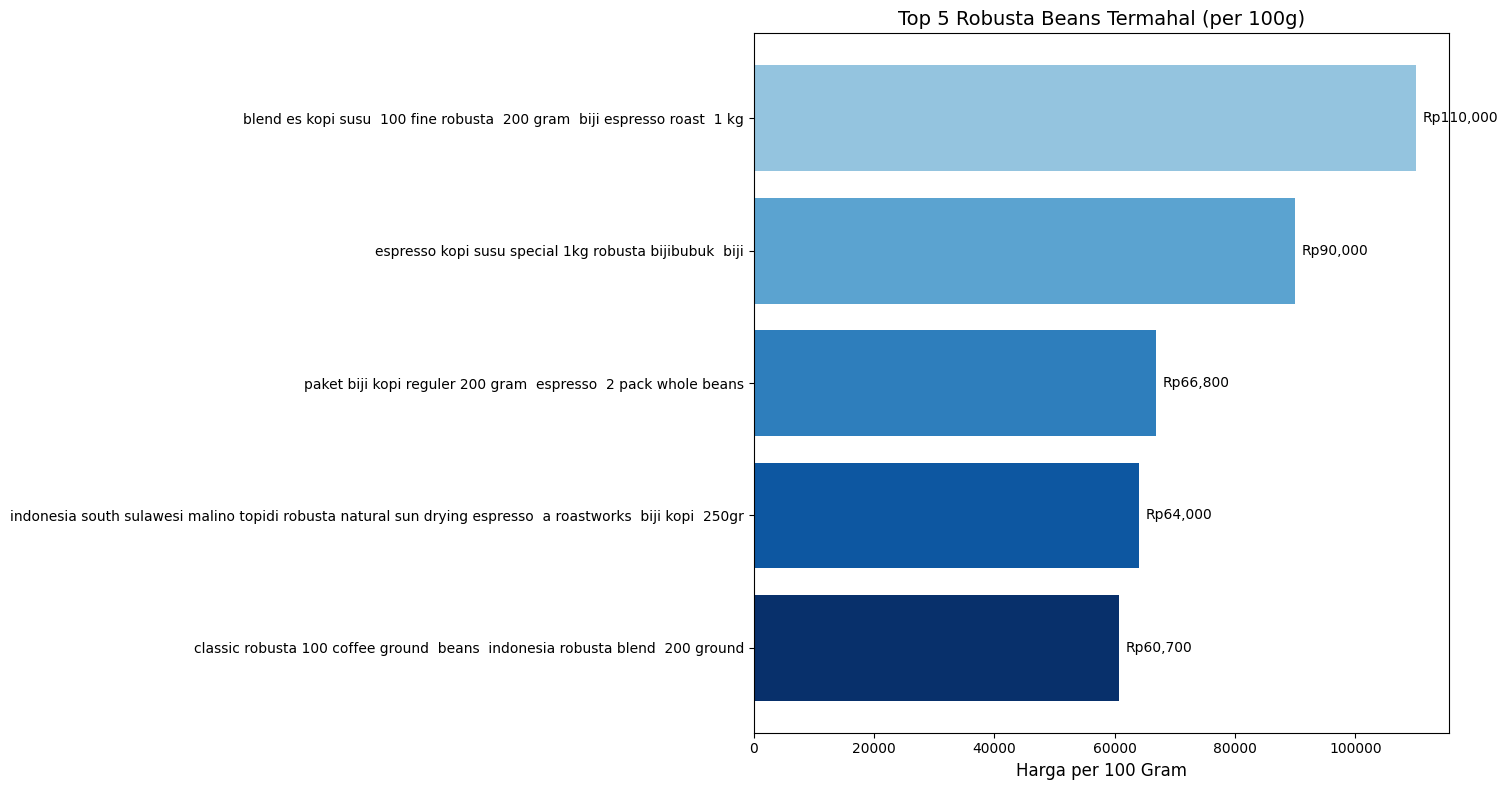

In [296]:
# Top 5 Most Expensive Robusta Products

top5_robusta = (
    robusta_product
    .sort_values('price_100g', ascending=False)
    .head(5)
)

names = top5_robusta['name']
prices = top5_robusta['price_100g']
n = len(prices)

colors = cm.Blues(np.linspace(0.4, 1, n))

plt.figure(figsize=(15, 8))
bars = plt.barh(names, prices, color=colors)
plt.xlabel('Harga per 100 Gram', fontsize=12)
plt.title('Top 5 Robusta Beans Termahal (per 100g)', fontsize=14)
plt.gca().invert_yaxis()
plt.ticklabel_format(style='plain', axis='x')

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max(prices)*0.01,
        bar.get_y() + bar.get_height()/2,
        f'Rp{int(width):,}',
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


selanjutnya untuk produk robusta termahal dapat kita lihat rate tertingginya hanya di angka 100000 rupiah per 100 gram. berdasarkan analisis erbandingan dengan arabica, dapat terlihat juga perbandingan yang cukup jauh dari sisi harga dari biji kopi jenis robusta yang mana grade terbaik nya (fine robusta) pun peruntukannya untuk espresso brewing. hal ini menandakan bahwa rasa dari robusta yang flat memang lebih cocok untuk brewing espresso ataupun untuk based dari es kopi susu atau varian kopi yang dikombinasikan dengan susu dan atau gula. 

#### **Top 5 robusta termurah**

In [ ]:
# # Top 5 Cheapest Beans
robusta_product.sort_values('price_100g', ascending=True).head()

,source,name,price,description,origin,process,roast_level,notes,desc_len,name_len,...,has_roast_level,has_notes,coverage_count,coverage,len_cat,text_quality,text_quality_score,quantity,price_gram,price_100g
88,fugol coffee roasters,espresso kopi susu special robusta 10 kg grosi...,158999,pirt 308327347034727 harap membaca keterangan ...,temanggung,NaN,medium,sweet,491,63,...,1,1,3,medium coverage,short,good,3,10000.0,16.0,1600.0
89,fugol coffee roasters,espresso kopi susu special robusta 5 kg grosir...,178000,pirt 308327347034727 harap membaca keterangan ...,temanggung,NaN,medium,sweet,489,62,...,1,1,3,medium coverage,short,good,3,5000.0,36.0,3600.0
735,hayati coffee roaster,full robusta single origin robusta natural ...,135000,full robusta region central java robusta 100 ...,java,natural,NaN,NaN,774,87,...,0,0,2,low coverage,short,average,2,1000.0,135.0,13500.0
178,fugol coffee roasters,biji kopi 1 kg robusta es kopi susu harga hema...,176000,halo great people kami ucapkan terima kasih at...,NaN,NaN,dark,sweet,1190,83,...,1,1,2,low coverage,long,average,2,1000.0,176.0,17600.0
214,fugol coffee roasters,espresso kopi susu special 200gr robusta bijib...,65000,halal id32110016691860324 penting semua pesana...,"indonesia, jawa, temanggung",NaN,medium,sweet,467,56,...,1,1,3,medium coverage,short,good,3,200.0,325.0,32500.0


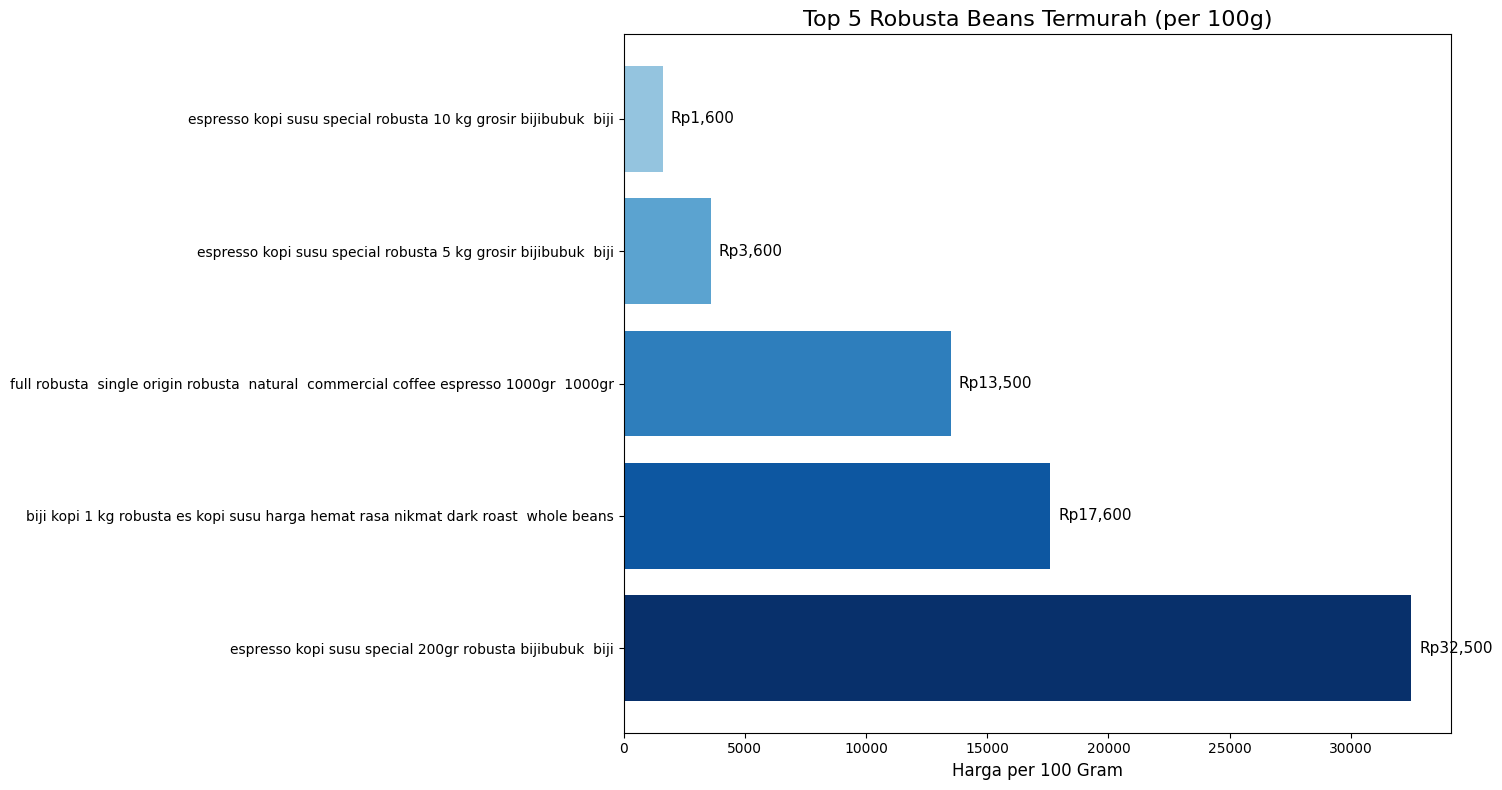

In [ ]:
# Top 5 Cheapest Beans Visualization

low5_robusta = (
    robusta_product
    .sort_values('price_100g', ascending=True)
    .head(5)
)

names = low5_robusta['name']
prices = low5_robusta['price_100g']
n = len(prices)

colors = cm.Blues(np.linspace(0.4, 1, n))

plt.figure(figsize=(15, 8))
bars = plt.barh(names, prices, color=colors)
plt.xlabel('Harga per 100 Gram', fontsize=12)
plt.title('Top 5 Robusta Beans Termurah (per 100g)', fontsize=16)
plt.gca().invert_yaxis() 
plt.ticklabel_format(style='plain', axis='x') 

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max(prices)*0.01,
        bar.get_y() + bar.get_height()/2,
        f'Rp{int(width):,}',
        va='center',
        fontsize=11
    )

plt.tight_layout()
plt.show()


**Summary**

Hasil analisis untuk produk Robusta termurah, terlihat bahwa mayoritas biji kopi untuk espresso brewing. Hal ini menunjukkan bahwa rasa biji Robusta relatif flat dibandingkan Arabica, sehingga baik untuk espresso. Berdasarkan perbandingan harga termurah dan termahal, peruntukan utama biji Robusta tetap espresso-based, yang menandakan bahwa biji ini memiliki sentimen pasar yang lebih rendah, karena kurangnya kompleksitas rasa dari hasil brewing.

Berdasarkan domain knowledge, biji Robusta memang lebih cocok untuk espresso karena rasa pahit, kandungan kafein, dan acidity yang lebih tinggi dibandingkan Arabica. Hal ini menjadikan biji Robusta kebanyakan digunakan sebagai base coffee dalam espresso.